## Telcom Churn Data Analysis ##

## Objective ##
Analyse customer-level data of a leading telecom firm, 
    
  1.Build predictive models to identify customers at high risk of churn 
  2.Identify the main indicators of churn.



# Steps followed

1.Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2.Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3.Derive new features.

4.Reduce the number of variables using PCA.

5.Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6.Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7.Finally, choose a model based on some evaluation metric.

In [1]:
#TO install SMOTE and Nearmiss package
!conda install -c conda-forge imbalanced-learn --yes 

Solving environment: done

# All requested packages already installed.



In [2]:
#Import the necessary librarires 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns
 

In [3]:
tel_df=pd.read_csv("telecom_churn_data.csv")

In [4]:
tel_df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.0
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.0
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.0
99998,7001905007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,687.065,...,0,1.0,NaN,NaN,NaN,751,0.00,0.00,0.00,0.0


In [5]:
tel_df.shape

(99999, 226)

In [6]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Data cleaning ##

## Check for missing values ##

In [7]:
100*tel_df.isnull().sum()/len(tel_df)

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           1.018010
std_og_t2o_mou           1.018010
loc_ic_t2o_mou           1.018010
last_date_of_month_6     0.000000
last_date_of_month_7     0.601006
last_date_of_month_8     1.100011
last_date_of_month_9     1.659017
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
arpu_9                   0.000000
onnet_mou_6              3.937039
onnet_mou_7              3.859039
onnet_mou_8              5.378054
onnet_mou_9              7.745077
offnet_mou_6             3.937039
offnet_mou_7             3.859039
offnet_mou_8             5.378054
offnet_mou_9             7.745077
roam_ic_mou_6            3.937039
roam_ic_mou_7            3.859039
roam_ic_mou_8            5.378054
roam_ic_mou_9            7.745077
roam_og_mou_6            3.937039
roam_og_mou_7            3.859039
roam_og_mou_8            5.378054
roam_og_mou_9            7.745077
loc_og_t2t_mou

## Filtering the high-value customers ##

In [8]:
# Filtering the columns taht contain recharge data (rech)

In [9]:
recharge_amt_cols =tel_df.columns[tel_df.columns.str.contains('rech_amt|rech_data')]

print(recharge_amt_cols)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [10]:
# Calculate the percentage of missing values in the recharge amount cols

100*tel_df.loc[:,recharge_amt_cols].isnull().sum()/len(tel_df)

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

In [11]:
#tel_df.dropna(subset=['av_rech_amt_data_6'], inplace=True)

Nearly 74% of recharge amt columns (except total recharge amt and max recharge amount columns) are found to contain NULL values 

In [12]:
tel_df.loc[:,recharge_amt_cols].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


As minimum value is 1 for average rechange amt data and total rec data for 6 , 7 and 8 months, we can imptute the missing values as 0. 

In [13]:
total_rech_null_cols=['total_rech_data_6','total_rech_data_7','total_rech_data_8', 
                      'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

# Use a dictonary to fill zeros for null columns
tel_df.fillna({ x:0 for x in total_rech_null_cols },inplace=True)

In [14]:
# Check the null columns after imputation with zeros
tel_df.loc[:,total_rech_null_cols].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
dtype: int64

In [15]:
tel_df['av_rech_amt_good_ph'] = (tel_df.total_rech_amt_6 + tel_df.total_rech_amt_7) / 2

In [16]:
# check the columns after the addtion of four new columns 
tel_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'av_rech_amt_good_ph'],
      dtype='object', length=227)

In [17]:
# filter to retrieve high valued customers who have recharged with an amount more than or equal to 
# 70th percentaile of the average recharge amount in the first two months 

percent_70 = tel_df.av_rech_amt_good_ph.quantile(0.7) 

filter_criteria= tel_df.av_rech_amt_good_ph >= percent_70

In [18]:
#Store the filtered highvalue customers in a separate dataframe
high_valued_tel_df=tel_df.loc[filter_criteria,:]


high_valued_tel_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_good_ph
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0


In [19]:
high_valued_tel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 227 entries, mobile_number to av_rech_amt_good_ph
dtypes: float64(180), int64(35), object(12)
memory usage: 52.2+ MB


There are nearly ## 30K ## high valued customers who have recharged more than or equal to 70th percentile of avgrage recharge amount in the first two months of good phase

## Tag churners ##


In [20]:
# create a new column as 'churn' 
# if customer has churned it will have value equal to  1 else 0 if customer has not churned

# Set all the rows of churn column to zero
high_valued_tel_df.loc[:,'churn']= 0

In [21]:
# Boolean condition to find customers with values greater than zeros

is_churned = (high_valued_tel_df.total_ic_mou_9 ==0) & (high_valued_tel_df.total_og_mou_9 ==0) & \
(high_valued_tel_df.vol_2g_mb_9 ==0) & (high_valued_tel_df.vol_3g_mb_9 ==0)

In [22]:
# Set all the rows of chrun column to 1 indicating the customers have not made any calls and mobile internet

high_valued_tel_df.loc[is_churned,'churn']=1

In [23]:
high_valued_tel_df.loc[high_valued_tel_df['churn']==1,'churn'].count()

2593

They are totally ## 2583 ## high valued customers have churned

Let's check how much percentile of high valued customers have churned

In [24]:
# percentage of chuned high valued customers

100*high_valued_tel_df.churn.sum()/len(is_churned)

8.64016527273333

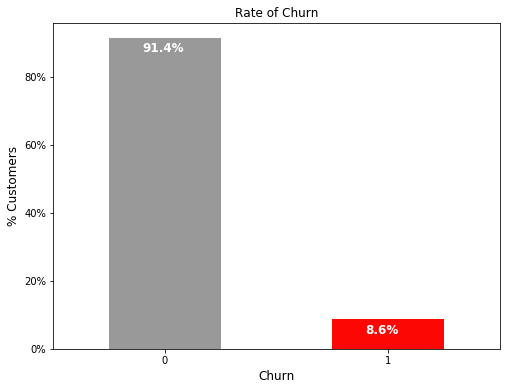

In [25]:
colors = ['#999999','#fc0703']
ax = (100*high_valued_tel_df.churn.value_counts()/len(is_churned)).plot(kind='bar',
                                                                          stacked = True, 
                                                                          rot=1,
                                                                          color = colors,
                                                                          figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Rate of Churn', size = 12)
ax.set_xlabel('Churn',size = 12)
ax.set_ylabel('% Customers',size = 12)


# create a list to collect the plt.patches data
total_patches = []

# find the values and append to list
for i in ax.patches:
    total_patches.append(i.get_width())

# set individual bar lables using above list
total = sum(total_patches)

for i in ax.patches:
    
    # get_width pulls left or right; get_y pushes up or down
   
    ax.text(i.get_x()+.15, i.get_height()-4.0, 
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold',
            size = 12)

## Totally 8.5% of high valued customers have chruned in  9th month.##

In [26]:
#Extract all the attributes corresponding to the churn phase

nineth_mon_cols = high_valued_tel_df.columns[high_valued_tel_df.columns.str.contains('_9')]

# Number of attributes associated with chrun phase 
len(nineth_mon_cols)

54

## Remove attributes associated with Churn phase ##

In [27]:
#Drop all the attributes corresponding to the churn phase

high_valued_tel_df.drop(nineth_mon_cols,axis=1,inplace=True)

# Feature Engineering

In [28]:

high_valued_tel_df[~(high_valued_tel_df.apply(lambda x : sum(x.isnull()),axis=1) > 75)]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_good_ph,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,NaN,1.0,1.0,315,21.03,910.65,122.16,0.00,519.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.00,380.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.00,459.0,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.00,408.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,NaN,NaN,NaN,720,0.00,0.00,0.00,0.00,640.0,0
24,7001125315,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,422.050,359.730,...,NaN,NaN,NaN,3072,0.00,0.00,0.00,0.00,385.0,0
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,977.020,2362.833,...,1.0,1.0,1.0,1328,358.10,2706.83,1714.67,0.00,1932.0,0
38,7000815202,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,363.987,486.558,...,NaN,NaN,NaN,1155,0.00,0.00,0.00,0.00,528.0,0
41,7000721289,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,482.832,425.764,...,NaN,NaN,NaN,2010,0.00,0.00,0.00,0.00,503.0,0


In [29]:
high_valued_tel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 174 entries, mobile_number to churn
dtypes: float64(137), int64(28), object(9)
memory usage: 40.1+ MB


After removal of attributes correspoding to Chrun phase we have ## 177 features ##

In [30]:
tel_df.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [31]:
high_valued_tel_df.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_o

**Remove the features with low variation i.e standard deviation list than threshold 0.3**

In [32]:
#find the features which are less than 0.2 treshold of Standard Deviation
low_std=high_valued_tel_df.std()[high_valued_tel_df.std() < 0.2].index.values.tolist()
print(low_std)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']


In [33]:
#drop all the columns which are less than 0.3 Standard deviation 
high_valued_tel_df.drop(low_std,axis=1,inplace=True)

In [34]:
def desc(search_col,incl_params='all'):
    
    
    cols=high_valued_tel_df.columns[high_valued_tel_df.columns.str.contains(search_col)]
    
    desc_df=high_valued_tel_df.loc[:,cols].describe()
    desc_df.loc['missing'] =high_valued_tel_df.loc[:,cols].isnull().sum()
    
    if incl_params == 'lite':
        print(desc_df.loc[['count','mean','std','missing']])
    else:
        print(desc_df)



In [35]:
def plot_violin_box(y,gtype):
    plt.rcParams["figure.figsize"] = [16, 5]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    
    if gtype=='violin':
        sns.violinplot(data=high_valued_tel_df,y=y[0],x='churn',ax=axes[0])
        sns.violinplot(data=high_valued_tel_df,y=y[1],x='churn',ax=axes[1])
        sns.violinplot(data=high_valued_tel_df,y=y[2],x='churn',ax=axes[2])
    else:
        if gtype=='box':
            sns.boxplot(data=high_valued_tel_df,y=y[0],x='churn',ax=axes[0])
            sns.boxplot(data=high_valued_tel_df,y=y[1],x='churn',ax=axes[1])
            sns.boxplot(data=high_valued_tel_df,y=y[2],x='churn',ax=axes[2])
        else:
            sns.scatterplot(data=high_valued_tel_df,y=y[0],x='churn',ax=axes[0])
            sns.scatterplot(data=high_valued_tel_df,y=y[1],x='churn',ax=axes[1])
            sns.scatterplot(data=high_valued_tel_df,y=y[2],x='churn',ax=axes[2])

In [36]:
# describe the featrues after imputation
desc('last_day_rch_amt')

         last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8
count          30011.000000        30011.000000        30011.000000
mean             104.485655          105.287128           95.653294
std              142.767207          141.148386          145.260363
min                0.000000            0.000000            0.000000
25%               30.000000           27.000000            0.000000
50%              110.000000           98.000000           50.000000
75%              120.000000          130.000000          130.000000
max             4010.000000         4010.000000         4449.000000
missing            0.000000            0.000000            0.000000


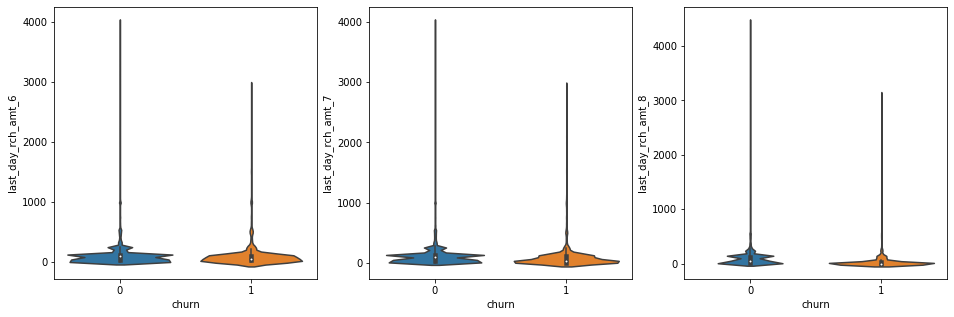

In [37]:
y=['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
plot_violin_box(y,'violin')

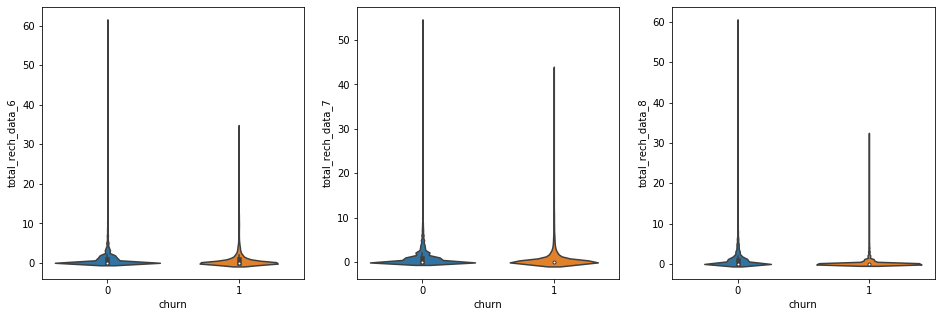

In [38]:
y=['total_rech_data_6','total_rech_data_7','total_rech_data_8']
plot_violin_box(y,'violin')

**last day recharge amount**

In [39]:
# describe the featrues before imputation
desc('last_day_rch_amt')

         last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8
count          30011.000000        30011.000000        30011.000000
mean             104.485655          105.287128           95.653294
std              142.767207          141.148386          145.260363
min                0.000000            0.000000            0.000000
25%               30.000000           27.000000            0.000000
50%              110.000000           98.000000           50.000000
75%              120.000000          130.000000          130.000000
max             4010.000000         4010.000000         4449.000000
missing            0.000000            0.000000            0.000000


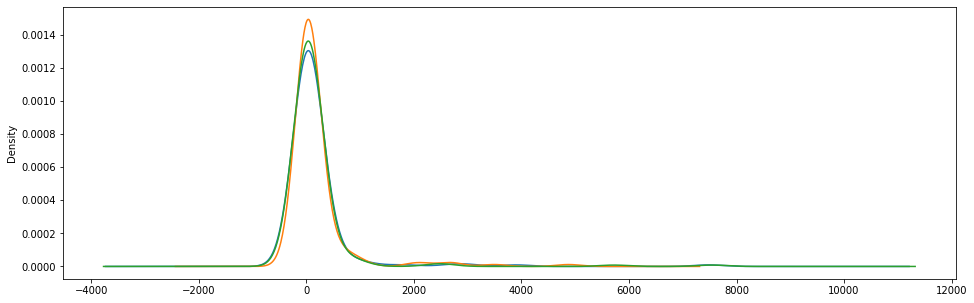

In [40]:
high_valued_tel_df.last_day_rch_amt_6.value_counts().plot(kind='density')
high_valued_tel_df.last_day_rch_amt_7.value_counts().plot(kind='density')
high_valued_tel_df.last_day_rch_amt_8.value_counts().plot(kind='density')


The last recharge amount for all the 6 , 7 and 8 months are right skewed. But we can't do can transformation like
logartmic to make it a normal distribution because most of the values are zero. The  right  skewness might also be due
to the presence of outliers. Better we can replace the missing values with zeros

In [41]:
#Let us drop the null cols of lastday recharge amount as 0

null_cols_lastday=['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']

# Use a dictonary to fill zeros for null columns
high_valued_tel_df.fillna({x:0 for x in null_cols_lastday},inplace=True)


In [42]:
# describe the featrues after imputation
desc('last_day_rch_amt','lite')

         last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8
count          30011.000000        30011.000000        30011.000000
mean             104.485655          105.287128           95.653294
std              142.767207          141.148386          145.260363
missing            0.000000            0.000000            0.000000


**churn vs last day recharge amount**

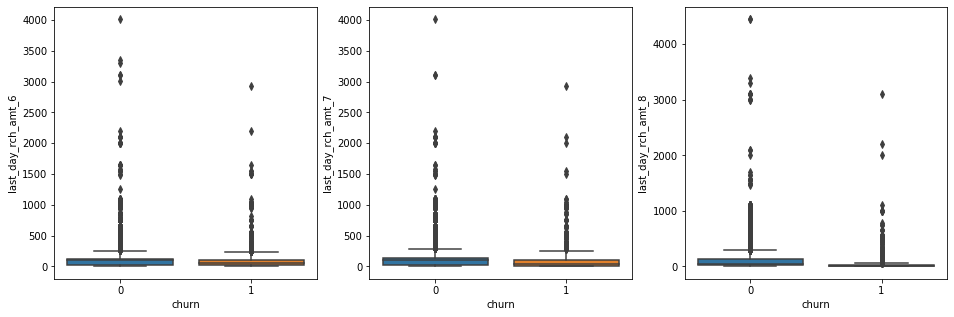

In [43]:
y=['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
plot_violin_box(y,'box')

We could a drop of churn customers in 8 month. As we deal with good phase high valued customers, we can reduce the two columns into one by deriving a new column

In [44]:
# create a new column last_day_rch_amt_good_ph

high_valued_tel_df['last_day_rch_amt_good_ph']= (high_valued_tel_df.last_day_rch_amt_6+high_valued_tel_df.last_day_rch_amt_7)/2

# `we can remove original last_day_rch_amt columns of 6 and 7 month
high_valued_tel_df.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1,inplace=True)

**total recharge amount**

In [45]:
# describe the featrues before imputation
desc('total_rech_amt')

         total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
count        30011.000000      30011.000000      30011.000000
mean           697.365833        695.962880        613.638799
std            539.325984        562.143146        601.821630
min              0.000000          0.000000          0.000000
25%            432.000000        426.500000        309.000000
50%            584.000000        581.000000        520.000000
75%            837.000000        835.000000        790.000000
max          35190.000000      40335.000000      45320.000000
missing          0.000000          0.000000          0.000000


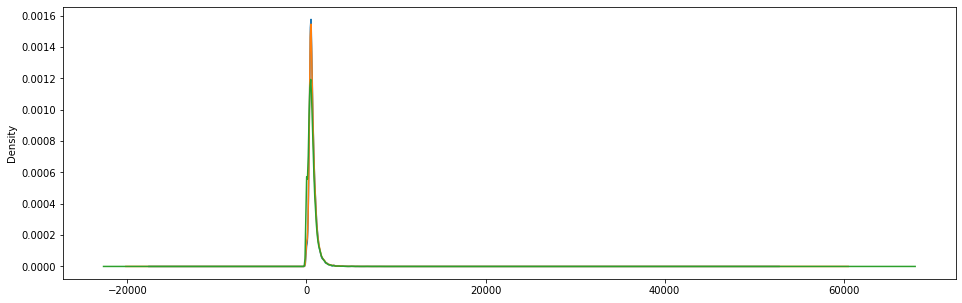

In [46]:
high_valued_tel_df.total_rech_amt_6.plot(kind='density')
high_valued_tel_df.total_rech_amt_7.plot(kind='density')
high_valued_tel_df.total_rech_amt_8.plot(kind='density')

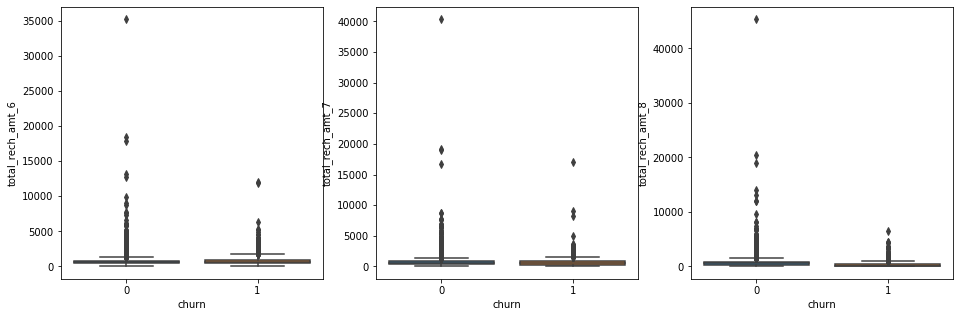

In [47]:

y=['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
plot_violin_box(y,'box')

As we see both of 6 and 7 th month total recharage amount of good phase customers are almost identical, let us drive
a new column total_rech_amt_good_ph
                                        

In [48]:
high_valued_tel_df['total_rech_amt_good_ph']=(high_valued_tel_df.total_rech_amt_6 + high_valued_tel_df.total_rech_amt_7)/2

# let us drop the original columns of 6 and 7 th month total_rech_amt_good_ph

high_valued_tel_df.drop(['total_rech_amt_6','total_rech_amt_7'],axis=1,inplace=True)


**maximum recharge data**

In [49]:
desc('max_rech_data')

         max_rech_data_6  max_rech_data_7  max_rech_data_8
count       11397.000000     11662.000000     11754.000000
mean          149.856629       151.005316       141.088140
std           124.714191       127.088795       126.200676
min             1.000000         1.000000         1.000000
25%            41.000000        33.000000        25.000000
50%           154.000000       154.000000       154.000000
75%           198.000000       198.000000       198.000000
max          1555.000000      1555.000000      1555.000000
missing     18614.000000     18349.000000     18257.000000


We can see that the minimum value is 1 and max value is 1555 across monthsSo, we confirm the missing values are the ones where thereis no recharge for data.

Let's impute the missing values by 0 impling no recharge data

In [50]:
#Let us drop the null cols of max_rech_data as 0

null_cols_maxrech=['max_rech_data_6','max_rech_data_7','max_rech_data_8']

# Use a dictonary to fill zeros for null columns
high_valued_tel_df.fillna({x:0 for x in null_cols_lastday},inplace=True)



In [51]:
# describe the featrues before imputation
desc('max_rech_data','lite')

         max_rech_data_6  max_rech_data_7  max_rech_data_8
count       11397.000000     11662.000000     11754.000000
mean          149.856629       151.005316       141.088140
std           124.714191       127.088795       126.200676
missing     18614.000000     18349.000000     18257.000000


**churn vs maximum reacharge data**

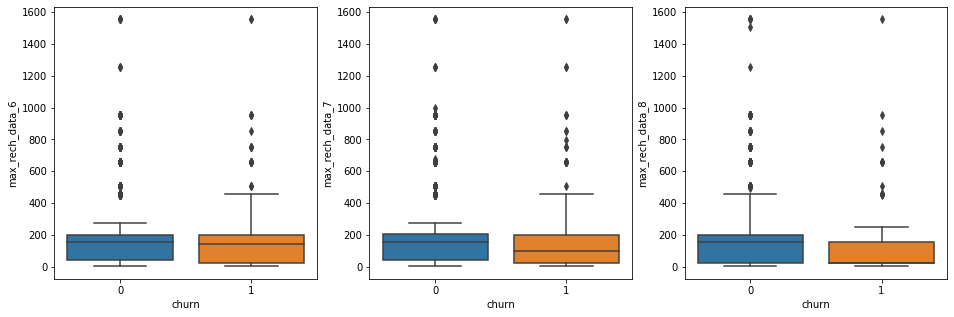

In [52]:

y=['max_rech_data_6','max_rech_data_7','max_rech_data_8']
plot_violin_box(y,'box')

As we see churn rate remains same for good phase customers, let us create a new column to hold both of the max recharge data

In [53]:
high_valued_tel_df['max_rech_data_good_ph']= (high_valued_tel_df.max_rech_data_6+high_valued_tel_df.max_rech_data_7)/2

# we drop the original columnsof max_rech_data 6th and 7th month

high_valued_tel_df.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)     

**Netpack columns**

In [54]:
netpack_2g_3g=high_valued_tel_df.columns[high_valued_tel_df.columns.str.contains('2g|3g')]

In [55]:
high_valued_tel_df.loc[:,netpack_2g_3g].describe()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,1.646398,1.849082,1.842607,0.821093,0.862974,0.800749,78.859009,78.171382,69.209105,258.392681,...,0.173903,0.185132,0.173203,0.137916,0.150212,0.140415,129.439626,135.127102,121.360548,6.562685
std,2.492688,2.739472,2.621453,1.603956,1.761751,1.747854,277.445058,280.331857,268.494284,866.195376,...,0.574285,0.620418,0.582932,0.875528,0.969286,0.974727,390.478591,408.024394,389.726031,48.638658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,14.450000,14.960000,9.620000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,1.990000,0.000000,0.000000
max,39.000000,48.000000,44.000000,29.000000,35.000000,45.000000,10285.900000,7873.550000,11117.610000,45735.400000,...,14.000000,16.000000,16.000000,29.000000,35.000000,41.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [56]:
# Let's check percentage of nulls in 2g  and 3g data
100*high_valued_tel_df.loc[:,netpack_2g_3g].isnull().sum()/len(high_valued_tel_df.loc[:,netpack_2g_3g])

count_rech_2g_6    62.023925
count_rech_2g_7    61.140915
count_rech_2g_8    60.834361
count_rech_3g_6    62.023925
count_rech_3g_7    61.140915
count_rech_3g_8    60.834361
vol_2g_mb_6         0.000000
vol_2g_mb_7         0.000000
vol_2g_mb_8         0.000000
vol_3g_mb_6         0.000000
vol_3g_mb_7         0.000000
vol_3g_mb_8         0.000000
arpu_3g_6          62.023925
arpu_3g_7          61.140915
arpu_3g_8          60.834361
arpu_2g_6          62.023925
arpu_2g_7          61.140915
arpu_2g_8          60.834361
monthly_2g_6        0.000000
monthly_2g_7        0.000000
monthly_2g_8        0.000000
sachet_2g_6         0.000000
sachet_2g_7         0.000000
sachet_2g_8         0.000000
monthly_3g_6        0.000000
monthly_3g_7        0.000000
monthly_3g_8        0.000000
sachet_3g_6         0.000000
sachet_3g_7         0.000000
sachet_3g_8         0.000000
aug_vbc_3g          0.000000
jul_vbc_3g          0.000000
jun_vbc_3g          0.000000
sep_vbc_3g          0.000000
dtype: float64

We see the number of null percentage is **identical for count of recharge 2g and 3g (say 20%,18%,32%)  with average revneue per user for 2g and 3g** Especially for good phase customers of 6 and 7 month we have only 20  and 18 % missing data. Its evident that if no recharge done, no revenue generated for that user. 

In [57]:
#Let us drop the null cols of 2g and 3g as 0

null_cols_2g3g=['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
                'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
                'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8']

# Use a dictonary to fill zeros for null columns
high_valued_tel_df.fillna({x:0 for x in null_cols_2g3g},inplace=True)

In [58]:
#Check for null after dropping count_rech_2g/3g 
high_valued_tel_df.loc[:,netpack_2g_3g].isnull().sum()

count_rech_2g_6    0
count_rech_2g_7    0
count_rech_2g_8    0
count_rech_3g_6    0
count_rech_3g_7    0
count_rech_3g_8    0
vol_2g_mb_6        0
vol_2g_mb_7        0
vol_2g_mb_8        0
vol_3g_mb_6        0
vol_3g_mb_7        0
vol_3g_mb_8        0
arpu_3g_6          0
arpu_3g_7          0
arpu_3g_8          0
arpu_2g_6          0
arpu_2g_7          0
arpu_2g_8          0
monthly_2g_6       0
monthly_2g_7       0
monthly_2g_8       0
sachet_2g_6        0
sachet_2g_7        0
sachet_2g_8        0
monthly_3g_6       0
monthly_3g_7       0
monthly_3g_8       0
sachet_3g_6        0
sachet_3g_7        0
sachet_3g_8        0
aug_vbc_3g         0
jul_vbc_3g         0
jun_vbc_3g         0
sep_vbc_3g         0
dtype: int64

**Let's us derive a good_phase columns from 2g and 3g columns**

In [59]:
#describe the recharge count fields of 2g abd 3g 
desc('count_rech_2g')
desc('count_rech_3g')

         count_rech_2g_6  count_rech_2g_7  count_rech_2g_8
count       30011.000000     30011.000000     30011.000000
mean            0.625237         0.718537         0.721669
std             1.731474         1.930925         1.870910
min             0.000000         0.000000         0.000000
25%             0.000000         0.000000         0.000000
50%             0.000000         0.000000         0.000000
75%             1.000000         1.000000         1.000000
max            39.000000        48.000000        44.000000
missing         0.000000         0.000000         0.000000
         count_rech_3g_6  count_rech_3g_7  count_rech_3g_8
count       30011.000000     30011.000000     30011.000000
mean            0.311819         0.335344         0.313618
std             1.065718         1.176000         1.161561
min             0.000000         0.000000         0.000000
25%             0.000000         0.000000         0.000000
50%             0.000000         0.000000         0.0000

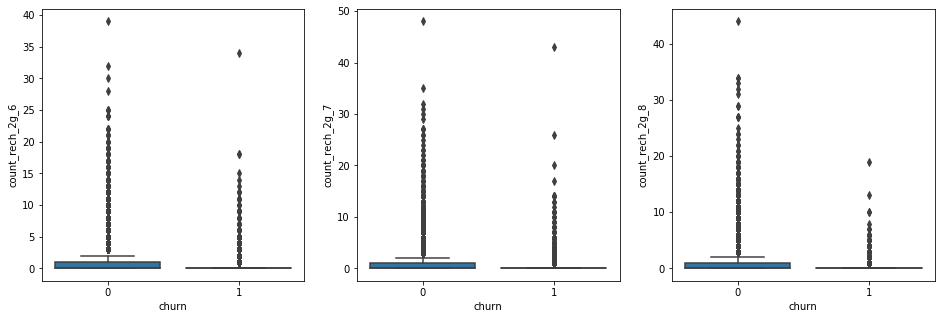

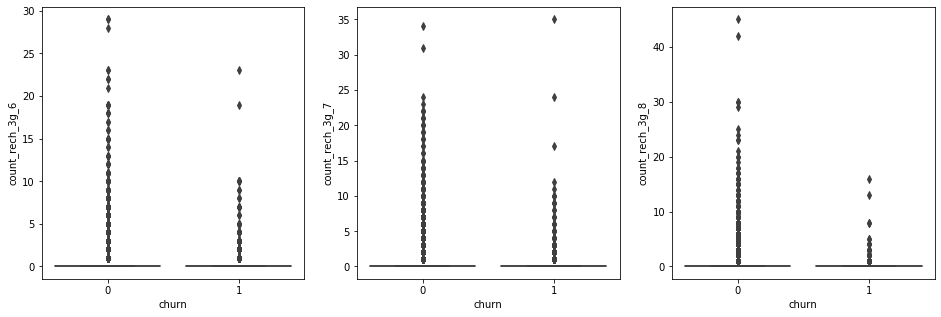

In [60]:
y=['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8']
plot_violin_box(y,'box')

y=['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']
plot_violin_box(y,'box')

As we see the count of recharge of 2g and 3g are almost same, lets create a new variable to hold total recharge of 2g
and 3g for good phase 


In [61]:

high_valued_tel_df['count_rech_2g_good_ph'] =  (high_valued_tel_df.count_rech_2g_6 + high_valued_tel_df.count_rech_2g_7) /2 
high_valued_tel_df['count_rech_3g_good_ph'] =  (high_valued_tel_df.count_rech_3g_6 + high_valued_tel_df.count_rech_3g_7) /2 

#Lets delete the original columns of 6 and 7 th month of count of recharge 
high_valued_tel_df.drop(['count_rech_2g_6', 'count_rech_2g_7','count_rech_3g_6', 'count_rech_3g_7'],axis=1,inplace=True)



**Volume of netpack**

In [62]:
#describe the volume of 2g abd 3g 
desc('vol_2g_mb')
desc('vol_3g_mb')

          vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count    30011.000000  30011.000000  30011.000000
mean        78.859009     78.171382     69.209105
std        277.445058    280.331857    268.494284
min          0.000000      0.000000      0.000000
25%          0.000000      0.000000      0.000000
50%          0.000000      0.000000      0.000000
75%         14.450000     14.960000      9.620000
max      10285.900000   7873.550000  11117.610000
missing      0.000000      0.000000      0.000000
          vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8
count    30011.000000  30011.000000  30011.000000
mean       258.392681    278.093737    269.864111
std        866.195376    855.682340    859.299266
min          0.000000      0.000000      0.000000
25%          0.000000      0.000000      0.000000
50%          0.000000      0.000000      0.000000
75%          0.000000      2.080000      0.000000
max      45735.400000  28144.120000  30036.060000
missing      0.000000      0.000000      0.000000


In [63]:
#Function to plot bar plot grouped by chrun against average of given columns       

def plot_bar(cols,ylabl,sflag=False,colors=['#859DE9','#97E985','#85CCE9']):
    
   # f,ax = plt.subplots(nrows=1, ncols=2)

    ax = (high_valued_tel_df.groupby(['churn'])[cols].mean()).plot(kind='bar',
                                                                          stacked=sflag,
                                                                          rot=1,
                                                                          color = colors,
                                                                          figsize = (7,6)
                                                                       )
    
    ax.set_title('Rate of Churn for ' + ylabl, size = 12)
    ax.set_xlabel('Churn',size = 12)
    ax.set_ylabel(ylabl,size = 12)

    # create a list to collect the plt.patches data
    total_patches = []

    # find the values and append to list
    for i in ax.patches:
        total_patches.append(i.get_width())

    # set individual bar lables using above list
    total = sum(total_patches)

    for i in ax.patches:
    
        # get_width pulls left or right; get_y pushes up or down
   
        ax.text(i.get_x(), i.get_height(), 
            str(round((i.get_height()/total), 1)),
            fontsize=12,
            color='black',
            weight = 'bold',
            size = 12)

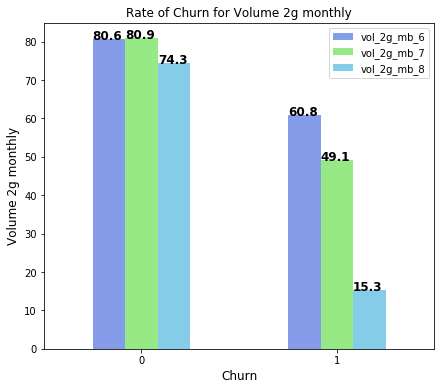

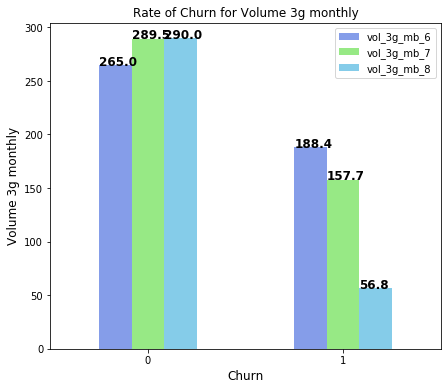

In [64]:
# Plot the graph by grouped by chrun and compare it with mean of volumes of 2g and 3g  

plot_bar(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],'Volume 2g monthly')
plot_bar(['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],'Volume 3g monthly')

It's evident that in 7th month  volume of 2g and 3g churns are very high compared to non-churns.This month customer
might be expecting good offers but company fail to provide.     

In [65]:
#Lets derive a new column for good phase customers for volume of 2g and 3g

high_valued_tel_df['vol_2g_mb_good_ph'] =  (high_valued_tel_df.vol_2g_mb_6 + high_valued_tel_df.vol_2g_mb_7) /2 
high_valued_tel_df['vol_3g_mb_good_ph'] =  (high_valued_tel_df.vol_3g_mb_6 + high_valued_tel_df.vol_3g_mb_7) /2 

#Lets delete the original columns of 6 and 7th month of volumne of 2g and 3g
high_valued_tel_df.drop(['vol_2g_mb_6', 'vol_2g_mb_7','vol_3g_mb_6', 'vol_3g_mb_7'],axis=1,inplace=True)



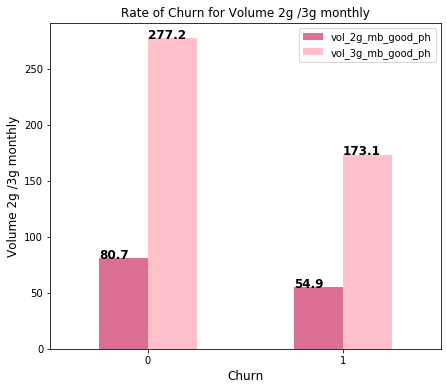

In [66]:
# Lets check after mean  volume of 2g and 3g for good phase to get a different insight

plot_bar(['vol_2g_mb_good_ph','vol_3g_mb_good_ph'],'Volume 2g /3g monthly',colors=['#DB7093','#FFC0CB'])

**We could find that compared to 2g , high valued customers  for good phase months who use 3g churn more This may due to bad reception of 3g in that area.**

**monthly and sachet r2 g /3g pack**

In [67]:
#describe the monthly 2g /3g recharge pack
desc('monthly_2g')
desc('monthly_3g')

         monthly_2g_6  monthly_2g_7  monthly_2g_8
count    30011.000000  30011.000000  30011.000000
mean         0.124854      0.131352      0.114058
std          0.374512      0.387673      0.357272
min          0.000000      0.000000      0.000000
25%          0.000000      0.000000      0.000000
50%          0.000000      0.000000      0.000000
75%          0.000000      0.000000      0.000000
max          4.000000      5.000000      5.000000
missing      0.000000      0.000000      0.000000
         monthly_3g_6  monthly_3g_7  monthly_3g_8
count    30011.000000  30011.000000  30011.000000
mean         0.173903      0.185132      0.173203
std          0.574285      0.620418      0.582932
min          0.000000      0.000000      0.000000
25%          0.000000      0.000000      0.000000
50%          0.000000      0.000000      0.000000
75%          0.000000      0.000000      0.000000
max         14.000000     16.000000     16.000000
missing      0.000000      0.000000      0.000000


In [68]:
#describe the sachet 2g/ 3g recharge pack
desc('sachet_2g')
desc('sachet_3g')

          sachet_2g_6   sachet_2g_7   sachet_2g_8
count    30011.000000  30011.000000  30011.000000
mean         0.500383      0.587185      0.607611
std          1.699665      1.900461      1.844444
min          0.000000      0.000000      0.000000
25%          0.000000      0.000000      0.000000
50%          0.000000      0.000000      0.000000
75%          0.000000      0.000000      0.000000
max         39.000000     48.000000     44.000000
missing      0.000000      0.000000      0.000000
          sachet_3g_6   sachet_3g_7   sachet_3g_8
count    30011.000000  30011.000000  30011.000000
mean         0.137916      0.150212      0.140415
std          0.875528      0.969286      0.974727
min          0.000000      0.000000      0.000000
25%          0.000000      0.000000      0.000000
50%          0.000000      0.000000      0.000000
75%          0.000000      0.000000      0.000000
max         29.000000     35.000000     41.000000
missing      0.000000      0.000000      0.000000


In [69]:
#Lets derive a new column for good phase customers for monthly of 2g and 3g

high_valued_tel_df['monthly_2g_good_ph'] =  (high_valued_tel_df.monthly_2g_6 + high_valued_tel_df.monthly_2g_7) /2 
high_valued_tel_df['monthly_3g_good_ph'] =  (high_valued_tel_df.monthly_3g_6 + high_valued_tel_df.monthly_3g_7) /2 

#Lets delete the original columns of 6 and 7 th month of monthly of 2g and 3g
high_valued_tel_df.drop(['monthly_2g_6', 'monthly_2g_7','monthly_3g_6', 'monthly_3g_7'],axis=1,inplace=True)



In [70]:

#Lets derive a new column for good phase customers for sachet of 2g and 3g

high_valued_tel_df['sachet_2g_good_ph'] =  (high_valued_tel_df.sachet_2g_6 + high_valued_tel_df.sachet_2g_7) /2 
high_valued_tel_df['sachet_3g_good_ph'] =  (high_valued_tel_df.sachet_3g_6 + high_valued_tel_df.sachet_3g_7) /2 

#Lets delete the original columns of 6 and 7 th month of sachet of 2g and 3g
high_valued_tel_df.drop(['sachet_2g_6', 'sachet_2g_7','sachet_3g_6', 'sachet_3g_7'],axis=1,inplace=True)



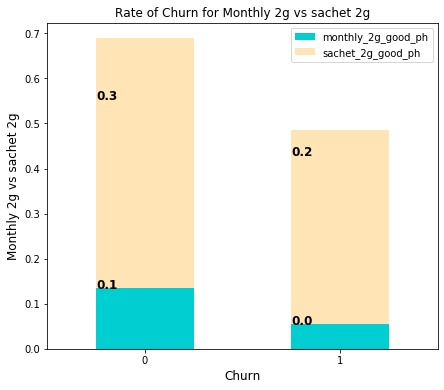

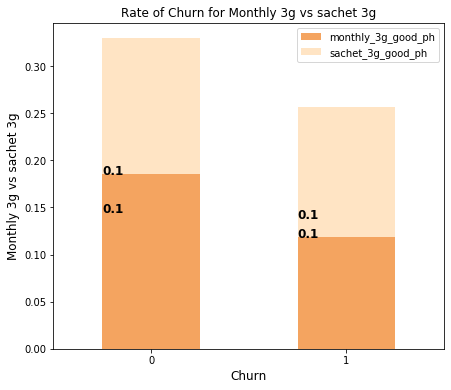

In [71]:
# Plot the graph to comapre monthly vs sachet recharge pack

plot_bar(['monthly_2g_good_ph','sachet_2g_good_ph'],'Monthly 2g vs sachet 2g','True',colors=['#00CED1','#FFE4B5']);
plot_bar(['monthly_3g_good_ph','sachet_3g_good_ph'],'Monthly 3g vs sachet 3g','True',colors=['#F4A460','#FFE4C4']);

We could find that monthly 2g and 3g  pack performs well. Company can apply strategies to increase the montly 2g/3g pack.
**As churns are high for sachet despite no. of non-churns is equally high, company can reduce the sachet offers and
increase monthly pack**

**Volume Based Cost**

In [72]:
#retrieve volume based cost columns
high_valued_tel_df.columns[high_valued_tel_df.columns.str.contains('vbc_')]

Index(['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')

In [73]:
#As the vbc columns are named in months, we can replace month names as 6 , 7 and 8

high_valued_tel_df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7',
                                   'aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# as we don't need 9th month column, we can drop it
high_valued_tel_df.drop('vbc_3g_9',axis=1,inplace=True)

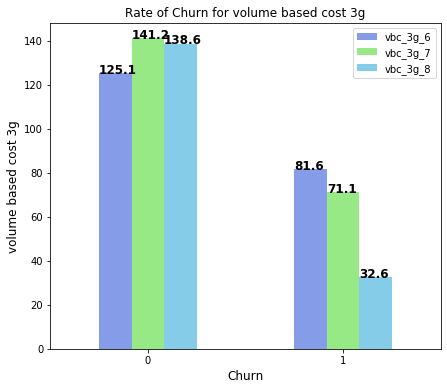

In [74]:
#plot the graph for volumbe based cost for 3g
plot_bar(['vbc_3g_6','vbc_3g_7','vbc_3g_8'],'volume based cost 3g');

**Volume based cost in 7th month is very high , ie, usage of pay per use is high and also chrun is equally high**
This denotes company has to offer good monthly offers to balance the chruns

In [75]:

#Lets derive a new column for good phase customers for vbc 3g

high_valued_tel_df['vbc_3g_6_good_ph'] =  (high_valued_tel_df.vbc_3g_6 + high_valued_tel_df.vbc_3g_7) /2 

#Lets delete the original columns of 6 and 7 th month of sachet of 2g and 3g
high_valued_tel_df.drop(['vbc_3g_6', 'vbc_3g_7'],axis=1,inplace=True)

**Average revenue per user**

In [76]:
#describe the average revenue per user 
desc('arpu_6')
desc('arpu_7')
desc('arpu_8')

               arpu_6
count    30011.000000
mean       587.284404
std        442.722413
min      -2258.709000
25%        364.161000
50%        495.682000
75%        703.922000
max      27731.088000
missing      0.000000
               arpu_7
count    30011.000000
mean       589.135427
std        462.897814
min      -2014.045000
25%        365.004500
50%        493.561000
75%        700.788000
max      35145.834000
missing      0.000000
               arpu_8
count    30011.000000
mean       534.857433
std        492.259586
min       -945.808000
25%        289.609500
50%        452.091000
75%        671.150000
max      33543.624000
missing      0.000000


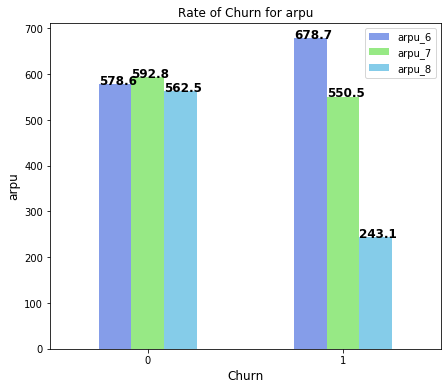

In [77]:
#Draw a barplot against maxium rech amt and chrun
plot_bar(['arpu_6','arpu_7','arpu_8'],'arpu')

As the variable of non-churn and churn are very less for arpu of good phase customers but chrun rate reduced for 8th month



In [78]:
#lets drop all the arpu columns

high_valued_tel_df.drop(['arpu_6','arpu_7','arpu_8'],axis=1,inplace=True)


**Average revenue per user for 2g**

In [79]:
desc('arpu_2g')

            arpu_2g_6     arpu_2g_7     arpu_2g_8
count    30011.000000  30011.000000  30011.000000
mean        50.234115     51.850331     47.836122
std        153.139966    157.885251    145.805206
min        -15.320000    -15.480000    -24.430000
25%          0.000000      0.000000      0.000000
50%          0.000000      0.000000      0.000000
75%          2.200000      2.370000      0.605000
max       6433.760000   4809.360000   3467.170000
missing      0.000000      0.000000      0.000000


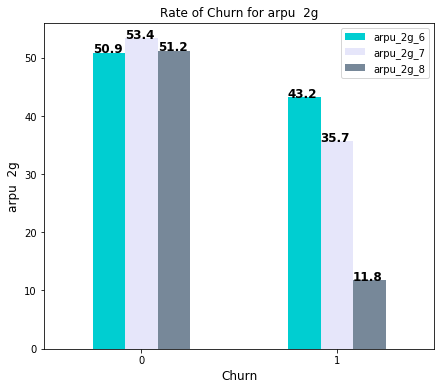

In [80]:
#plot the graph for average revenue per user  for 3g
plot_bar(['arpu_2g_6','arpu_2g_7','arpu_2g_8'],'arpu  2g',colors=['#00CED1','#E6E6FA','#778899']);

In [81]:
# let's derive new variables for all good phase to hold arpu 2g

high_valued_tel_df['arpu_2g_mou_good_ph'] = (high_valued_tel_df.arpu_2g_6 + high_valued_tel_df.arpu_2g_7)/2


# let us drop all the original of arpu 2g variables

high_valued_tel_df.drop(['arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

**Average revenue per user for 3g**

In [82]:
desc('arpu_3g')

            arpu_3g_6     arpu_3g_7     arpu_3g_8
count    30011.000000  30011.000000  30011.000000
mean        53.998587     55.886344     52.128978
std        171.792133    176.292875    163.835930
min        -30.280000    -26.040000    -20.040000
25%          0.000000      0.000000      0.000000
50%          0.000000      0.000000      0.000000
75%          0.000000      0.000000      0.000000
max       6362.280000   4980.900000   3716.900000
missing      0.000000      0.000000      0.000000


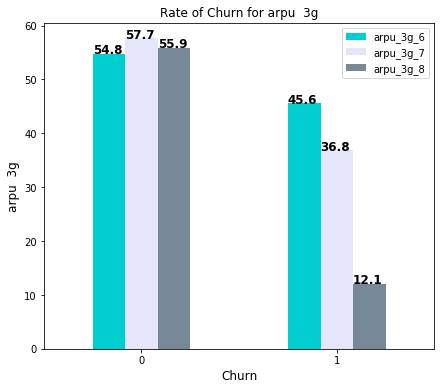

In [83]:
#plot the graph for average revenue per user  for 3g
plot_bar(['arpu_3g_6','arpu_3g_7','arpu_3g_8'],'arpu  3g',colors=['#00CED1','#E6E6FA','#778899']);

**Company is not earning much in 3g because average revenue per user is going in loss. N o. of high valued customer are churned more than exisitng customers**

In [84]:
# let's derive new variables for all good phase to hold arpu 3g

high_valued_tel_df['arpu_3g_mou_good_ph'] = (high_valued_tel_df.arpu_3g_6 + high_valued_tel_df.arpu_3g_7)/2


# let us drop all the original of arpu 3g variables

high_valued_tel_df.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8'],axis=1,inplace=True)

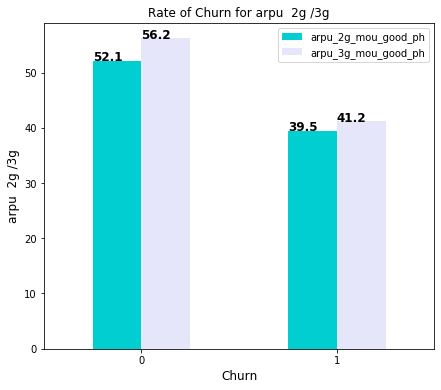

In [85]:
#plot the graph for average revenue per user  for 2g vs  3g
plot_bar(['arpu_2g_mou_good_ph','arpu_3g_mou_good_ph'],'arpu  2g /3g',colors=['#00CED1','#E6E6FA']);

The average revenue per user for 2g and 3g is more than compared to non-churned. Company has to device some stratigies
to reduce the churn for arpu for 3g and 3g

**minutes of usage (mou) fields**

In [86]:
high_valued_tel_df.columns[high_valued_tel_df.columns.str.contains('mou')]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

**Analysis of incoming mou fields**

In [87]:
high_valued_tel_df.columns[high_valued_tel_df.columns.str.contains('.*ic.*mou')]

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8'],
      dtype='object')

In [88]:
#function to draw pairplot for give y column against many x variables
def plot_pair(ycol,xcols):
    
    sns.pairplot(data=high_valued_tel_df
             ,y_vars=ycol
             ,x_vars=xcols,kind="reg")
    

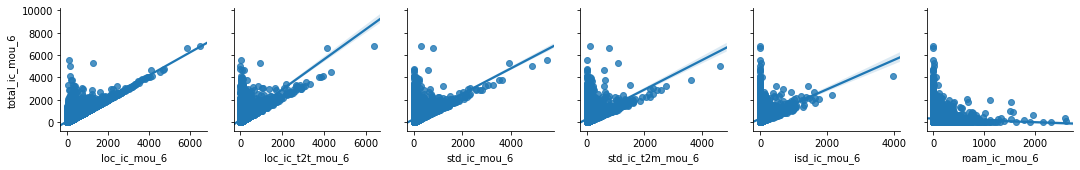

In [89]:
ic_6=['loc_ic_mou_6','loc_ic_t2t_mou_6','std_ic_mou_6','std_ic_t2m_mou_6','isd_ic_mou_6','roam_ic_mou_6']
plot_pair('total_ic_mou_6',ic_6)

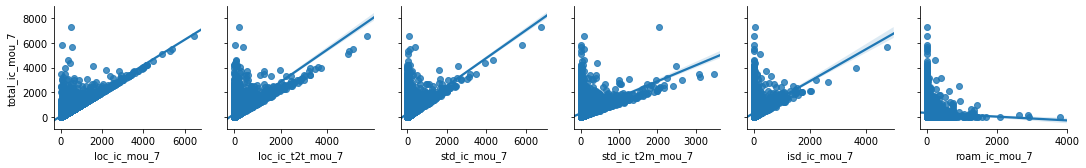

In [90]:
ic_7=['loc_ic_mou_7','loc_ic_t2t_mou_7','std_ic_mou_7','std_ic_t2m_mou_7','isd_ic_mou_7','roam_ic_mou_7']
plot_pair('total_ic_mou_7',ic_7)

In [91]:
# let's derive new variables for all good phase ic mou

high_valued_tel_df['roam_ic_mou_good_ph'] = (high_valued_tel_df.roam_ic_mou_6 + high_valued_tel_df.roam_ic_mou_7)/2

high_valued_tel_df['loc_ic_t2t_mou_good_ph'] = (high_valued_tel_df.loc_ic_t2t_mou_6 + high_valued_tel_df.loc_ic_t2t_mou_7)/2
high_valued_tel_df['loc_ic_t2f_mou_good_ph'] = (high_valued_tel_df.loc_ic_t2f_mou_6 + high_valued_tel_df.loc_ic_t2f_mou_7)/2
high_valued_tel_df['loc_ic_t2m_mou_good_ph'] = (high_valued_tel_df.loc_ic_t2m_mou_6 + high_valued_tel_df.loc_ic_t2m_mou_7)/2

high_valued_tel_df['std_ic_t2t_mou_good_ph'] = (high_valued_tel_df.std_ic_t2t_mou_6 + high_valued_tel_df.std_ic_t2t_mou_7)/2
high_valued_tel_df['std_ic_t2f_mou_good_ph'] = (high_valued_tel_df.std_ic_t2f_mou_6 + high_valued_tel_df.std_ic_t2f_mou_7)/2
high_valued_tel_df['std_ic_t2m_mou_good_ph'] = (high_valued_tel_df.std_ic_t2m_mou_6 + high_valued_tel_df.std_ic_t2m_mou_7)/2

high_valued_tel_df['isd_ic_mou_good_ph'] = (high_valued_tel_df.isd_ic_mou_6 + high_valued_tel_df.isd_ic_mou_7)/2


# let us drop all the original of ic mou variables

ic = high_valued_tel_df.columns[high_valued_tel_df.columns.str.contains('.*_ic_.*mou_6|.*_ic_.*mou_7')]

high_valued_tel_df.drop(ic,axis=1,inplace=True)


In [92]:
high_valued_tel_df.columns[high_valued_tel_df.columns.str.contains('.*og.*mou')]

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')

**Analysis of outgoing mou fields**

In [93]:
# let's derive new variables for all good phase og mou

high_valued_tel_df['roam_og_mou_good_ph'] = (high_valued_tel_df.roam_og_mou_6 + high_valued_tel_df.roam_og_mou_7)/2

high_valued_tel_df['loc_og_t2t_mou_good_ph'] = (high_valued_tel_df.loc_og_t2t_mou_6 + high_valued_tel_df.loc_og_t2t_mou_7)/2
high_valued_tel_df['loc_og_t2f_mou_good_ph'] = (high_valued_tel_df.loc_og_t2f_mou_6 + high_valued_tel_df.loc_og_t2f_mou_7)/2
high_valued_tel_df['loc_og_t2m_mou_good_ph'] = (high_valued_tel_df.loc_og_t2m_mou_6 + high_valued_tel_df.loc_og_t2m_mou_7)/2

high_valued_tel_df['std_og_t2t_mou_good_ph'] = (high_valued_tel_df.std_og_t2t_mou_6 + high_valued_tel_df.std_og_t2t_mou_7)/2
high_valued_tel_df['std_og_t2f_mou_good_ph'] = (high_valued_tel_df.std_og_t2f_mou_6 + high_valued_tel_df.std_og_t2f_mou_7)/2
high_valued_tel_df['std_og_t2m_mou_good_ph'] = (high_valued_tel_df.std_og_t2m_mou_6 + high_valued_tel_df.std_og_t2m_mou_7)/2

high_valued_tel_df['isd_og_mou_good_ph'] = (high_valued_tel_df.isd_og_mou_6 + high_valued_tel_df.isd_og_mou_7)/2
high_valued_tel_df['spl_og_mou_good_ph'] = (high_valued_tel_df.spl_og_mou_6 + high_valued_tel_df.spl_og_mou_7)/2

# let us drop all the original of og mou variables

og = high_valued_tel_df.columns[high_valued_tel_df.columns.str.contains('.*_og_.*mou_6|.*_og_.*mou_7')]

high_valued_tel_df.drop(og,axis=1,inplace=True)

**Analysis of onnet mou**

In [94]:
desc('onnet_mou')

          onnet_mou_6   onnet_mou_7   onnet_mou_8
count    29695.000000  29708.000000  29073.000000
mean       299.184718    307.447285    276.234168
std        462.202367    483.244786    471.505518
min          0.000000      0.000000      0.000000
25%         42.960000     42.660000     32.210000
50%        128.330000    127.950000    106.280000
75%        357.120000    364.567500    309.980000
max       7376.710000   8157.780000  10752.560000
missing    316.000000    303.000000    938.000000


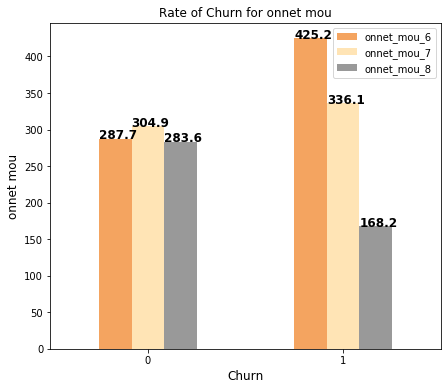

In [95]:
plot_bar(['onnet_mou_6','onnet_mou_7','onnet_mou_8'],'onnet mou',colors=['#F4A460','#FFE4B5','#999999']);

In [96]:
#Lets derive a new column for good phase customers for onnet mou

high_valued_tel_df['onnet_mou_good_ph'] =  (high_valued_tel_df.onnet_mou_6 + high_valued_tel_df.onnet_mou_7) /2 

#Lets delete the original columns of 6 and 7th month of onnet mou 
high_valued_tel_df.drop(['onnet_mou_6', 'onnet_mou_7'],axis=1,inplace=True)

**Analysis of offnet mou**

In [97]:
desc('offnet_mou')

         offnet_mou_6  offnet_mou_7  offnet_mou_8
count    29695.000000  29708.000000  29073.000000
mean       422.380819    428.248096    387.121245
std        471.096294    487.103204    480.279273
min          0.000000      0.000000      0.000000
25%        141.410000    139.587500    107.660000
50%        285.960000    285.485000    251.360000
75%        527.315000    536.827500    493.510000
max       8362.360000   9667.130000  14007.340000
missing    316.000000    303.000000    938.000000


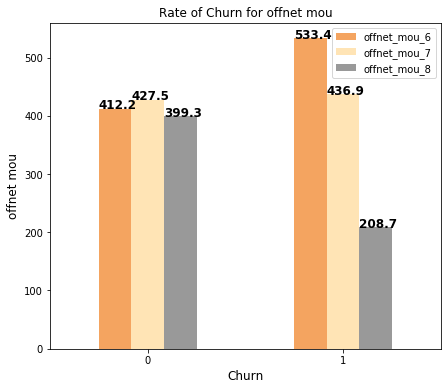

In [98]:
plot_bar(['offnet_mou_6','offnet_mou_7','offnet_mou_8'],'offnet mou',colors=['#F4A460','#FFE4B5','#999999']);

**Analysis of other mou variables**

In [99]:
#Lets derive a new column for good phase customers for offnet mou

high_valued_tel_df['offnet_mou_good_ph'] =  (high_valued_tel_df.offnet_mou_6 + high_valued_tel_df.offnet_mou_7) /2 

#Lets delete the original columns of 6 and 7th month of offnet mou 
high_valued_tel_df.drop(['offnet_mou_6', 'offnet_mou_7'],axis=1,inplace=True)

In [100]:
# ets derive two new columns for og_other and ic_others

high_valued_tel_df['ic_others_good_ph'] = (high_valued_tel_df.ic_others_6 + high_valued_tel_df.ic_others_6)/2
high_valued_tel_df['og_others_good_ph'] = (high_valued_tel_df.og_others_6 + high_valued_tel_df.og_others_7)/2

#Lets delete the original columns of ic_other and og_other
high_valued_tel_df.drop(['og_others_6','og_others_7','ic_others_6','ic_others_7'],axis=1,inplace=True)

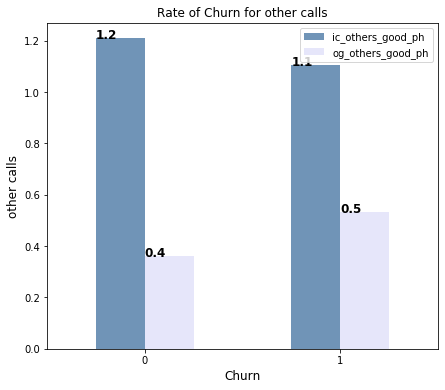

In [101]:
plot_bar(['ic_others_good_ph','og_others_good_ph'],'other calls',colors=['#7094b7','#e6e6fa']);

**Age on Network**

In [102]:
#describe the age on network column                                                                                                       
desc('aon')

                  aon
count    30011.000000
mean      1264.064776
std        975.263117
min        180.000000
25%        480.000000
50%        914.000000
75%       1924.000000
max       4321.000000
missing      0.000000


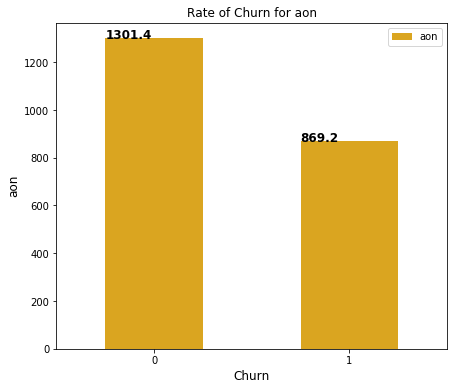

In [103]:
# plot the barplot for age on network in days
plot_bar(['aon'],'aon',colors=['#daa520']);

We could infer that customesr who have been before 763 days with network company churned more.  

**Analysis of date columns**

In [104]:
dt_cols=high_valued_tel_df.columns[high_valued_tel_df.columns.str.contains('date')]

#convert the date  to datetime columns
for x in list(dt_cols):
    high_valued_tel_df[x]= pd.to_datetime(high_valued_tel_df[x])

In [105]:
dt_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

**last date_of_month**

In [106]:
#describe the last date of months 
desc('last_date_of_month')

        last_date_of_month_6 last_date_of_month_7 last_date_of_month_8
count                  30011                29980                29854
unique                     1                    1                    1
top      2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00
freq                   30011                29980                29854
first    2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00
last     2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00
missing                    0                   31                  157


As there is only one unique row in all the last date of months, lets drop all the last_date_of_month column


In [107]:
high_valued_tel_df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'],axis=1,inplace=True)

**date of last_rech and date of last_rech_data**

In [108]:
#describe the date of last recharge  data and last recharge
desc('date_of_last_rech')

         date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  \
count                  29949                29897                29417   
unique                    30                   31                   31   
top      2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00   
freq                    8724                 7927                 6670   
first    2014-06-01 00:00:00  2014-07-01 00:00:00  2014-08-01 00:00:00   
last     2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00   
missing                   62                  114                  594   

        date_of_last_rech_data_6 date_of_last_rech_data_7  \
count                      11397                    11662   
unique                        30                       31   
top          2014-06-30 00:00:00      2014-07-31 00:00:00   
freq                         927                      891   
first        2014-06-01 00:00:00      2014-07-01 00:00:00   
last         2014-06-30 00:00:00      201

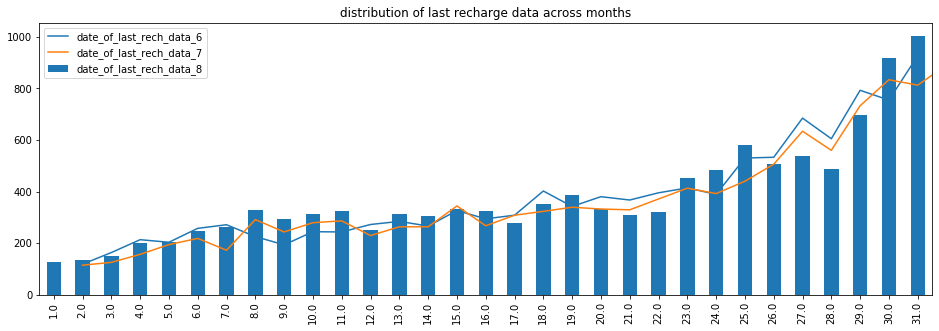

In [109]:
#Let's plot line and bar graph for  last rechrage data for 6,7, and 8 months

high_valued_tel_df.date_of_last_rech_data_6.dt.day.value_counts().sort_index(ascending=True).plot(kind='line',legend=True,title="distribution of last recharge data across months")
high_valued_tel_df.date_of_last_rech_data_7.dt.day.value_counts().sort_index(ascending=True).plot(kind='line',legend=True)
high_valued_tel_df.date_of_last_rech_data_8.dt.day.value_counts().sort_index(ascending=True).plot(kind='bar',legend=True);

We can infer that customers have recharged for data more on that last day of the month. To get the chruned customers, we can aggreate over median than mean beacuase taking mean is meaningless in days

In [110]:
print(high_valued_tel_df.groupby('churn')['date_of_last_rech_data_6'].apply(lambda x : x.dt.day.median()))
print(high_valued_tel_df.groupby('churn')['date_of_last_rech_data_7'].apply(lambda x : x.dt.day.median()))
print(high_valued_tel_df.groupby('churn')['date_of_last_rech_data_8'].apply(lambda x : x.dt.day.median()))

churn
0    21.0
1    21.0
Name: date_of_last_rech_data_6, dtype: float64
churn
0    23.0
1    20.0
Name: date_of_last_rech_data_7, dtype: float64
churn
0    22.0
1    15.5
Name: date_of_last_rech_data_8, dtype: float64


In [111]:
#As the chruned and non customer count is equal for 6 and 7 month, we can derive a new column to store combined days for good phase months

date_of_last_rech_data_good_ph = (high_valued_tel_df.date_of_last_rech_data_6.dt.day + high_valued_tel_df.date_of_last_rech_data_7.dt.day) /2

#Lets drop the original columns of last recharage data 

high_valued_tel_df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7'],axis=1,inplace=True)

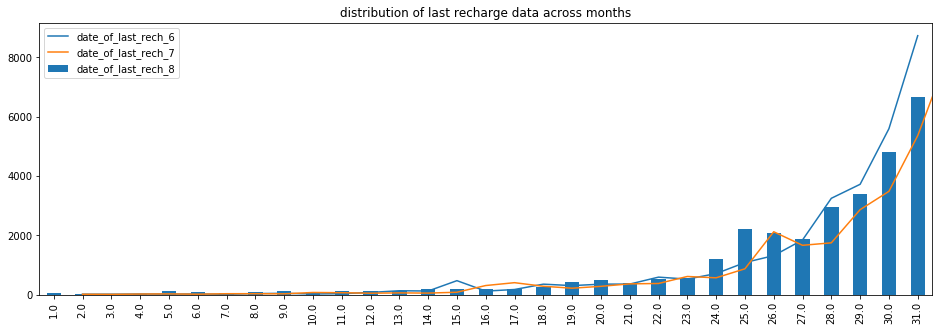

In [112]:
#Let's plot line and bar graph for  last rechrage for 6,7, and 8 months
high_valued_tel_df.date_of_last_rech_6.dt.day.value_counts().sort_index(ascending=True).plot(kind='line',legend=True,title="distribution of last recharge data across months")
high_valued_tel_df.date_of_last_rech_7.dt.day.value_counts().sort_index(ascending=True).plot(kind='line',legend=True)
high_valued_tel_df.date_of_last_rech_8.dt.day.value_counts().sort_index(ascending=True).plot(kind='bar',legend=True);

We can infer that customers have recharged more on that last day of the month. To get the chruned customers, we can aggreate over median than mean beacuase taking mean is meaningless in days

In [113]:
print(high_valued_tel_df.groupby('churn')['date_of_last_rech_6'].apply(lambda x : x.dt.day.median()))
print(high_valued_tel_df.groupby('churn')['date_of_last_rech_7'].apply(lambda x : x.dt.day.median()))
print(high_valued_tel_df.groupby('churn')['date_of_last_rech_8'].apply(lambda x : x.dt.day.median()))

churn
0    28.0
1    29.0
Name: date_of_last_rech_6, dtype: float64
churn
0    29.0
1    28.0
Name: date_of_last_rech_7, dtype: float64
churn
0    29.0
1    26.0
Name: date_of_last_rech_8, dtype: float64


In [114]:
#As the chruned and non customer count is equal for 6 and 7 month, we can derive a new column to store combined days for good phase months

date_of_last_rech_good_ph = (high_valued_tel_df.date_of_last_rech_6.dt.day + high_valued_tel_df.date_of_last_rech_7.dt.day) /2

#Lets drop the original columns of last recharage  

high_valued_tel_df.drop(['date_of_last_rech_6','date_of_last_rech_7'],axis=1,inplace=True)

In [115]:
high_valued_tel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 96 columns):
mobile_number               30011 non-null int64
onnet_mou_8                 29073 non-null float64
offnet_mou_8                29073 non-null float64
roam_ic_mou_8               29073 non-null float64
roam_og_mou_8               29073 non-null float64
loc_og_t2t_mou_8            29073 non-null float64
loc_og_t2m_mou_8            29073 non-null float64
loc_og_t2f_mou_8            29073 non-null float64
loc_og_t2c_mou_8            29073 non-null float64
loc_og_mou_8                29073 non-null float64
std_og_t2t_mou_8            29073 non-null float64
std_og_t2m_mou_8            29073 non-null float64
std_og_t2f_mou_8            29073 non-null float64
std_og_mou_8                29073 non-null float64
isd_og_mou_8                29073 non-null float64
spl_og_mou_8                29073 non-null float64
og_others_8                 29073 non-null float64
total_og_mou_8            

In [116]:
high_valued_tel_df.head()

,mobile_number,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,loc_og_t2m_mou_good_ph,std_og_t2t_mou_good_ph,std_og_t2f_mou_good_ph,std_og_t2m_mou_good_ph,isd_og_mou_good_ph,spl_og_mou_good_ph,onnet_mou_good_ph,offnet_mou_good_ph,ic_others_good_ph,og_others_good_ph
7,7000701601,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,378.005,13.795,13.37,40.825,0.09,2.25,56.260,510.295,15.74,0.000
8,7001524846,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,...,75.770,124.995,0.00,11.865,0.00,0.00,382.360,87.645,0.00,0.000
13,7002191713,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,...,99.205,266.195,0.00,154.150,0.00,0.00,305.075,266.295,83.48,0.000
16,7000875565,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,...,209.640,5.235,0.00,43.750,0.00,1.63,62.260,263.015,0.00,0.000
17,7000187447,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,...,29.270,573.860,0.00,0.775,0.00,1.29,597.595,30.820,0.00,0.465


**facebook users**

In [117]:
#describe the fb_user columns 
desc('fb_user')

            fb_user_6     fb_user_7     fb_user_8
count    11397.000000  11662.000000  11754.000000
mean         0.897605      0.889813      0.837332
std          0.303181      0.313136      0.369078
min          0.000000      0.000000      0.000000
25%          1.000000      1.000000      1.000000
50%          1.000000      1.000000      1.000000
75%          1.000000      1.000000      1.000000
max          1.000000      1.000000      1.000000
missing  18614.000000  18349.000000  18257.000000


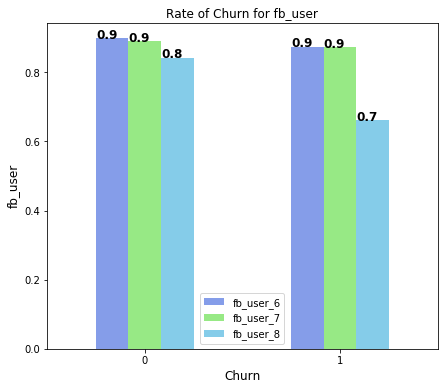

In [118]:
#draw a barplot for all fb_user columns
plot_bar(['fb_user_6','fb_user_7','fb_user_8'],'fb_user')

As the variation of churned and non-churned are very less for fb_users , no benefit it brings to the model 

In [119]:
#let us drop all the fb_user columns

high_valued_tel_df.drop(['fb_user_6','fb_user_7','fb_user_8'],axis=1,inplace=True)

In [120]:
#describe maximum recharge amount
desc('max_rech_amt')

         max_rech_amt_6  max_rech_amt_7  max_rech_amt_8
count      30011.000000    30011.000000    30011.000000
mean         171.414048      175.661058      162.869348
std          174.703215      181.545389      172.605809
min            0.000000        0.000000        0.000000
25%          110.000000      110.000000       67.000000
50%          120.000000      128.000000      130.000000
75%          200.000000      200.000000      198.000000
max         4010.000000     4010.000000     4449.000000
missing        0.000000        0.000000        0.000000


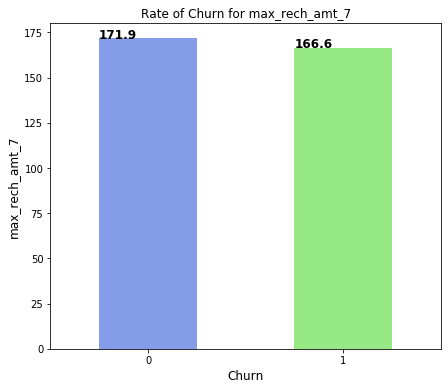

In [121]:
#Draw a barplot against maxium rech amt and chrun
plot_bar('max_rech_amt_6','max_rech_amt_7','max_rech_amt_8')

With respect to max_rech_amt, the variation between chrun and non churn varies by just 1%.

In [122]:
#Lets drop all the max recharge amount fields
high_valued_tel_df.drop(['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'],axis=1,inplace=True)


In [123]:
#Drop unimpactfull column  mobile number
high_valued_tel_df.drop('mobile_number',axis=1,inplace=True)

**Remove action phase cols**

In [124]:
high_valued_tel_df['total_rech_num_good_ph'] = (high_valued_tel_df.total_rech_num_6 + high_valued_tel_df.total_rech_num_7)/2
high_valued_tel_df['total_rech_data_good_ph']= (high_valued_tel_df.total_rech_data_6 + high_valued_tel_df.total_rech_data_7)/2
high_valued_tel_df['av_rech_amt_data_good_ph'] = (high_valued_tel_df.av_rech_amt_data_6+ high_valued_tel_df.av_rech_amt_data_7)/2

#Lets drop the original columns of total_rec_num,total_rech_data and avg_rech_amt_data
high_valued_tel_df.drop(['total_rech_num_6','total_rech_num_7','total_rech_data_6','total_rech_data_7',
                        'av_rech_amt_data_6','av_rech_amt_data_7'],axis=1,inplace=True)

In [125]:
high_valued_tel_df.columns.values

array(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_8', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'vbc_3g_8',
       'av_rech_amt_good_ph', 'churn', 'last_day_rch_amt_good_ph',
       '

In [126]:
high_valued_tel_df.isnull().sum()

onnet_mou_8                 938
offnet_mou_8                938
roam_ic_mou_8               938
roam_og_mou_8               938
loc_og_t2t_mou_8            938
loc_og_t2m_mou_8            938
loc_og_t2f_mou_8            938
loc_og_t2c_mou_8            938
loc_og_mou_8                938
std_og_t2t_mou_8            938
std_og_t2m_mou_8            938
std_og_t2f_mou_8            938
std_og_mou_8                938
isd_og_mou_8                938
spl_og_mou_8                938
og_others_8                 938
total_og_mou_8                0
loc_ic_t2t_mou_8            938
loc_ic_t2m_mou_8            938
loc_ic_t2f_mou_8            938
loc_ic_mou_8                938
std_ic_t2t_mou_8            938
std_ic_t2m_mou_8            938
std_ic_t2f_mou_8            938
std_ic_mou_8                938
total_ic_mou_8                0
isd_ic_mou_8                938
ic_others_8                 938
total_rech_num_8              0
total_rech_amt_8              0
                           ... 
monthly_

In [127]:
high_valued_tel_df=high_valued_tel_df.apply(lambda x : (pd.to_numeric(x, errors='coerce')))

**Find columns that are holding 20% of null**

In [128]:
#find 20% nof null columns
null_20=high_valued_tel_df.apply(lambda x : (100*sum(x.isnull())/len(x)) >0.2,axis=0)

#display 20% null columns
high_valued_tel_df.loc[:,null_20].columns

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'max_rech_data_8', 'max_rech_data_good_ph',
       'roam_ic_mou_good_ph', 'loc_ic_t2t_mou_good_ph',
       'loc_ic_t2f_mou_good_ph', 'loc_ic_t2m_mou_good_ph',
       'std_ic_t2t_mou_good_ph', 'std_ic_t2f_mou_good_ph',
       'std_ic_t2m_mou_good_ph', 'isd_ic_mou_good_ph', 'roam_og_mou_good_ph',
       'loc_og_t2t_mou_good_ph', 'loc_og_t2f_mou_good_ph',
       'loc_og_t2m_mou_good_ph', 'std_og_t2t_mou_good_ph',
       'std_og_t2f_mou_good_ph', 'std_og_t2m_mou_good_ph',
    

In [129]:
#As only 20% of data are null, we can impute them with 0

high_valued_tel_df.fillna('0',inplace=True)

#display dtaframe after imputation of null
high_valued_tel_df.columns[high_valued_tel_df.isnull().any(axis=0)]

Index([], dtype='object')

In [130]:
#get the float type columns
float_cols=high_valued_tel_df.select_dtypes(include = ['float64']).columns


In [131]:
high_valued_tel_df.isnull().sum()

onnet_mou_8                 0
offnet_mou_8                0
roam_ic_mou_8               0
roam_og_mou_8               0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_8            0
loc_og_mou_8                0
std_og_t2t_mou_8            0
std_og_t2m_mou_8            0
std_og_t2f_mou_8            0
std_og_mou_8                0
isd_og_mou_8                0
spl_og_mou_8                0
og_others_8                 0
total_og_mou_8              0
loc_ic_t2t_mou_8            0
loc_ic_t2m_mou_8            0
loc_ic_t2f_mou_8            0
loc_ic_mou_8                0
std_ic_t2t_mou_8            0
std_ic_t2m_mou_8            0
std_ic_t2f_mou_8            0
std_ic_mou_8                0
total_ic_mou_8              0
isd_ic_mou_8                0
ic_others_8                 0
total_rech_num_8            0
total_rech_amt_8            0
                           ..
monthly_3g_good_ph          0
sachet_2g_good_ph           0
sachet_3g_

## HeatMap ##

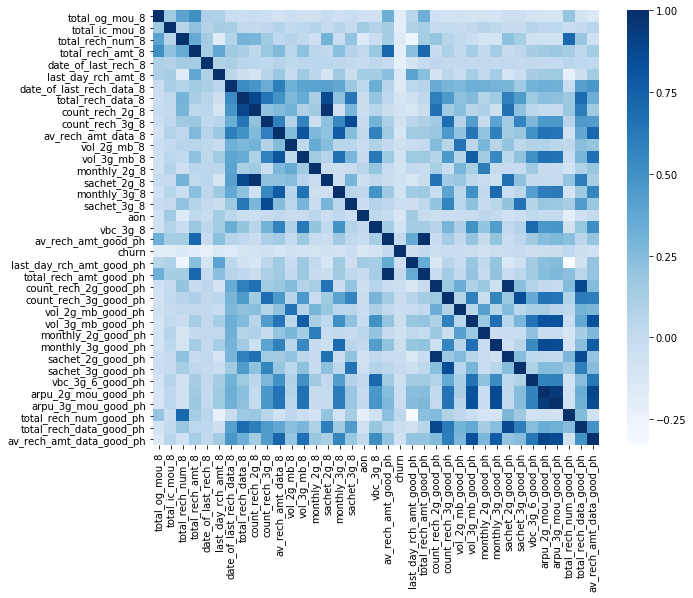

In [132]:
#Heat map showing the correlation between the features
plt.figure(figsize=(10, 8))
sns.heatmap(high_valued_tel_df.corr(), cmap="Blues")
plt.show()

In [133]:
high_valued_tel_df.describe()

,total_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_8,count_rech_2g_8,count_rech_3g_8,...,monthly_2g_good_ph,monthly_3g_good_ph,sachet_2g_good_ph,sachet_3g_good_ph,vbc_3g_6_good_ph,arpu_2g_mou_good_ph,arpu_3g_mou_good_ph,total_rech_num_good_ph,total_rech_data_good_ph,av_rech_amt_data_good_ph
count,30011.000000,30011.000000,30011.000000,30011.000000,3.001100e+04,30011.000000,3.001100e+04,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,623.774684,295.426531,10.225317,613.638799,1.198644e+18,95.653294,-5.059335e+18,1.035287,0.721669,0.313618,...,0.128103,0.179518,0.543784,0.144064,128.243825,51.042223,54.942466,12.017394,0.995468,94.136915
std,685.983313,360.343153,9.478572,601.821630,1.480993e+18,145.260363,5.189717e+18,2.405187,1.870910,1.161561,...,0.336706,0.540083,1.668069,0.852098,366.111430,140.948801,157.127122,8.729543,2.130622,177.500322
min,0.000000,0.000000,0.000000,0.000000,-9.223372e+18,0.000000,-9.223372e+18,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-7.740000,-15.135000,0.500000,0.000000,0.000000
25%,188.790000,78.930000,4.000000,309.000000,1.408925e+18,0.000000,-9.223372e+18,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000,0.000000,0.000000
50%,435.330000,193.440000,8.000000,520.000000,1.409184e+18,50.000000,-9.223372e+18,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.500000,0.000000,0.000000
75%,833.100000,380.410000,13.000000,790.000000,1.409357e+18,130.000000,1.408234e+18,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.562500,24.362500,12.405000,15.000000,1.000000,147.000000
max,14043.060000,5990.710000,196.000000,45320.000000,1.409443e+18,4449.000000,1.409443e+18,60.000000,44.000000,45.000000,...,4.500000,11.500000,38.000000,27.000000,8190.585000,4390.540000,4390.560000,155.500000,54.500000,5142.500000


In [134]:
high_valued_tel_df.shape

(30011, 86)

## Model Building

In [135]:
from sklearn.metrics import confusion_matrix ,accuracy_score,roc_auc_score,precision_score,f1_score

score_df=pd.DataFrame(index=['Accuracy','Sensitivity','Specificity','Precision','F1 score','AUC'])

def get_score(modelname,model,X_test,y_test,y_pred):
    
    
     #Confusion Matrix
    cm = confusion_matrix(y_test,y_pred)
   
    #labels for the xticks and yticks
    tick_labels = ['non_chrun', 'churn']  
    
    plt.figure(figsize=(4, 4))
    
    ax1 = sns.heatmap(cm, cbar=False, yticklabels=tick_labels, xticklabels=tick_labels, annot=True,fmt="d")
    ax1.set_title(modelname + ' Confusion Matrix', color='red')
    ax1.set_ylabel('Actual Labels', size=8)
    ax1.set_xlabel('Predicted Labels', size=8)
   
    accuracy=accuracy_score(y_test,y_pred)
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    auc = roc_auc_score(y_test,y_pred)
    f1  = f1_score(y_test,y_pred)
    
    score_df[f'{modelname}']=[accuracy,sensitivity,specificity,precision,auc,f1]
    
    print(score_df.loc[:,[f'{modelname}']])

**Create X, Y variables**

In [136]:
X=high_valued_tel_df.drop(['churn'],axis=1)
Y=high_valued_tel_df['churn']

In [137]:
X.shape

(30011, 85)

**Feature Standardization**

In [138]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

**Train and Test data split**

In [139]:
from sklearn.model_selection import train_test_split

#Split the dataset into 70% train and 30% test 
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,train_size=0.7,random_state=7)

**Logistic regression**

In [140]:
# Build logistic regression model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

#fit the lg model to train dataset
lg.fit(X_train,y_train)

#test the model with trained model
y_pred=lg.predict(X_test)

             Logistic Regression
Accuracy                0.925033
Sensitivity             0.251269
Specificity             0.989654
Precision               0.699647
F1 score                0.620462
AUC                     0.369748


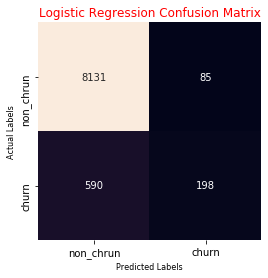

In [141]:
get_score('Logistic Regression',lg,X_test,y_test,y_pred)


**Though Logistic regression has good accuracy score of 93% but recall / sensitivy is of 0.25 whch is bad. This true positive score indicates only 25% the model has correctly identified chruned customers. This is expected, since non-churn-customer has more records than the other.**

Let's see what would be best evaluation metirc to gauage the model?


## Evaluation Metric ##

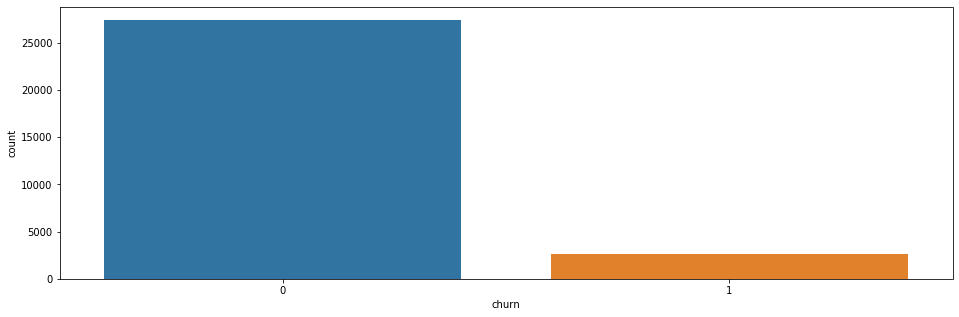

In [142]:
#Display the impbalce in data before sampling
sns.countplot(high_valued_tel_df.churn);

As there is high Imbalance in the data, Accuracy cannot be taken as metric instead recall /Sensitivity can be taken 
as an evaluation metric because this score will identify the percentage of churned customers  who are correctly identified as chruned.

## Handle Imbalance Data ##

Oversampling and Undersampling methods are used to handle imbalance in the data

Lets apply an over-sampling method called SMOTE to create synthetic (not duplicate) samples of the minority class. Hence making the minority class equal to the majority class. 

 ## SMOTE - Over Sampling Method ##

In [143]:
# import SMOTE sampler from imblearn library
from imblearn.over_sampling import SMOTE 

#instantiate the SMOTE 
sm =SMOTE(kind = "regular")

#fit the model on X_train and y_train
X_train_sm,y_train_sm = sm.fit_sample(X_train,y_train)

In [144]:
print(X_train_sm.shape,y_train_sm.shape)

(38404, 85) (38404,)


Now both the majority ( non-churned )and minority  (churned) class have equal weightage

In [145]:
lg_sm = LogisticRegression()

#fit the lg model after smote to train dataset
lg_sm.fit(X_train_sm,y_train_sm)

#test the model with trained model
y_pred_sm=lg_sm.predict(X_test)

Scores for Logistic regression model after SMOTE

             Logistic Regression SMOTE
Accuracy                      0.814527
Sensitivity                   0.847716
Specificity                   0.811344
Precision                     0.301172
F1 score                      0.829530
AUC                           0.444444


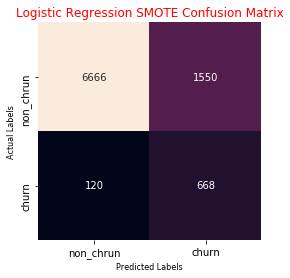

In [146]:
print("Scores for Logistic regression model after SMOTE\n")
      
get_score('Logistic Regression SMOTE',lg_sm,X_test,y_test,y_pred_sm)



**After SMOTE logistic regression has reduced the accuracy to 81 % from 92% but it has good recall score of 0.84 from 0.25. This has increased the true positive case of identifying chrun customers correctly.**

## NearMiss - Under Sampling method ##

Here, the majority class will be reduced to the total number of minority class, so that both classes will have equal number of records.

In [147]:
# import NearMiss sampler from imblearn library
from imblearn.under_sampling import NearMiss 

#instantiate the NearMiss sampler
nr=NearMiss()

#fit the model on X_train and y_train
X_train_nr,y_train_nr = nr.fit_sample(X_train,y_train)

In [148]:
#After Nearmiss sampling check their shape
print(X_train_nr.shape,y_train_nr.shape)

(3610, 85) (3610,)


 The majority class (Non-Churn) has been reduced to the total number of minority class ( Churned)

In [149]:
lg_nr = LogisticRegression()

#fit the lg model after NearMiss to train dataset
lg_nr.fit(X_train_nr,y_train_nr)

#test the model with trained model
y_pred_nr=lg_nr.predict(X_test)

Scores for Logistic regression model after NearMiss

             Logistic Regression NearMiss
Accuracy                         0.374056
Sensitivity                      0.725888
Specificity                      0.340312
Precision                        0.095461
F1 score                         0.533100
AUC                              0.168732


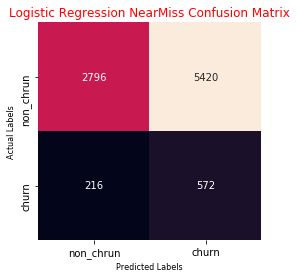

In [150]:
print("Scores for Logistic regression model after NearMiss\n")
      
get_score('Logistic Regression NearMiss',lg_nr,X_test,y_test,y_pred_nr)

**NearMiss Sensitivity score is only 0.72 with very only precision of 0.09 . SO let us consider the SMOTE sampled  X_train and y_train to pass the model further**

In [151]:
#Copy SMOTE sampled date to X_train and y_train
X_train = X_train_sm
y_train = y_train_sm

print(X_train.shape,y_train.shape)

(38404, 85) (38404,)


Prediciting the model with 85 features will invite Curse of dimensionality issue. So, let's use dimensionality reduction technique
like PCA to bring the same level of prediction with reduced number of features capable enough to explain the vairance
in the data

## Dimensionality reduction using PCA ##

In [152]:
from sklearn.decomposition import PCA

pca=PCA(svd_solver='randomized', random_state=7)

In [153]:
pca.fit_transform(X_train)

array([[-1.91812659e+00, -9.04729629e-01, -3.48463887e-01, ...,
         1.25483798e-14,  1.02721997e-14,  1.74475087e-15],
       [ 1.07519947e+00,  4.89781848e+00,  5.37529022e-01, ...,
         1.38218167e-14, -3.19684756e-15, -1.26095577e-16],
       [ 4.79744559e+00, -3.76666010e-01, -3.42531836e+00, ...,
        -1.00651708e-16,  1.27305342e-14, -1.35136400e-15],
       ...,
       [-1.86200404e+00, -2.00183370e+00, -4.19579940e-02, ...,
         3.05562904e-17,  4.19613838e-17, -4.45971475e-19],
       [-2.23220957e+00,  1.77395067e-01, -6.11239771e-01, ...,
        -7.89437766e-17,  1.96773563e-17,  4.31449860e-17],
       [-1.87393710e+00, -3.49499185e-01, -9.33727912e-01, ...,
        -1.12189407e-17, -3.90791250e-17, -1.40647828e-17]])

In [154]:
X_train.shape

(38404, 85)

In [155]:
pca.components_[0]

array([ 0.00465573,  0.03884121,  0.00183123, -0.0052881 ,  0.04482531,
        0.07959203,  0.04287571,  0.01522434,  0.08207086, -0.01897227,
       -0.00616799,  0.0158658 , -0.0164943 ,  0.02368388,  0.01843812,
        0.00455871,  0.03122022,  0.05451587,  0.08816368,  0.04853146,
        0.09687289,  0.02158037,  0.02981123,  0.02018393,  0.03626315,
        0.10296814,  0.02832679,  0.00962983,  0.05744176,  0.1308641 ,
        0.09658955,  0.0892311 ,  0.20232892,  0.16619895,  0.22702412,
        0.10787343,  0.17038978,  0.23844058,  0.07763843,  0.20372383,
        0.07069832,  0.09572691,  0.17363155,  0.09921009,  0.04440449,
        0.16067501,  0.0849487 ,  0.09138955,  0.0849487 ,  0.23988571,
        0.12109272,  0.2048033 ,  0.0861257 ,  0.22871075,  0.07486378,
        0.20489916,  0.10794343,  0.11846264,  0.18247363,  0.23956214,
        0.23582015, -0.006039  ,  0.03979557,  0.04366864,  0.0689825 ,
        0.00819069,  0.01844971,  0.01191629,  0.02602674, -0.02

In [156]:
# check the features with top PCA components

colnames = list(X_scaled)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pca_df.head()

,PC1,PC2,PC3,Feature
0,0.004656,0.213263,-0.063519,onnet_mou_8
1,0.038841,0.244446,0.018641,offnet_mou_8
2,0.001831,0.036870,0.224652,roam_ic_mou_8
3,-0.005288,0.043518,0.155399,roam_og_mou_8
4,0.044825,0.115957,0.005145,loc_og_t2t_mou_8


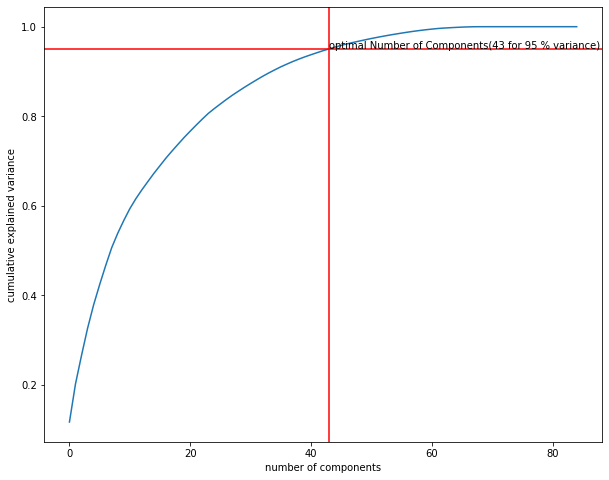

In [157]:
#plot  cumulative variance vs  no. of components

fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.annotate(s ='optimal Number of Components(43 for 95 % variance)' ,xy=[43,0.95], xytext = (43, 0.95))
plt.axvline(x=43,c ='red')
plt.axhline(y=0.95, c = 'red')
plt.show()

**We have 43 features explaining 95% of variance after PCA dimenality reduction**

So we reduced from 85 to 43 features which are enough to do precition Let's check after using PCA reduced features on x_train dataset 
and build logistic regression model whether or not it provides same level prediction scores

In [158]:
from sklearn.decomposition import IncrementalPCA

#pass only 43 features
pca_reduced = IncrementalPCA(n_components=43)

#fit and transform the x_scaled trained data using 43 reduced features
X_train_pca=pca_reduced.fit_transform(X_train)

#trasform the rules to test data
X_test_pca=pca_reduced.transform(X_test)


#build log reg model with PCA

lg_pca = LogisticRegression()

#fit log reg model

lg_pca.fit(X_train_pca,y_train)

#test the model with trained pca model
y_pred_pca=lg_pca.predict(X_test_pca)

Scores for Logistic regression model after PCA

             LogRec PCA
Accuracy       0.811750
Sensitivity    0.841371
Specificity    0.808909
Precision      0.296910
F1 score       0.825140
AUC            0.438928


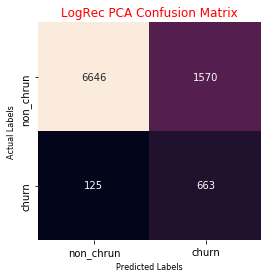

In [159]:
print("Scores for Logistic regression model after PCA\n")
      
get_score('LogRec PCA',lg_pca,X_test_pca,y_test,y_pred_pca)

As we the  scores of Logistic regression with PCA of 43 fetures are almost identical. Going forward let us 
x_train_pca as the dataset for prediction using other classifiers

## Baseline model ##

## Ensemble model##

## Random Forest ##

Lets try the Random forest model with default paramters

In [160]:
# import the required libraries
from sklearn.ensemble import RandomForestClassifier

# Build Random Forest model with default params
rfc= RandomForestClassifier() 

# fit the Random forest model 
rfc.fit(X_train_pca,y_train)

#predict the results of model with test data
y_pred_rfc=rfc.predict(X_test_pca)

             Default-Random Forest
Accuracy                  0.911928
Sensitivity               0.560914
Specificity               0.945594
Precision                 0.497188
F1 score                  0.753254
AUC                       0.527132


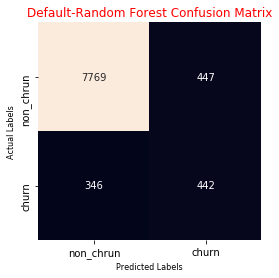

In [161]:
#Display the metrics
get_score('Default-Random Forest',rfc,X_test_pca,y_test,y_pred_rfc)

## HyperParameter Tuning ##

Using GridSearchCV consumed lot of time , so applied the gird search parms by random sweetspot

Used Entropy instead of Gini, because Entropy performs better incase of imbalance in the data

In [162]:
# set hyper parameters
best_params  = {'max_depth': 10,
                'max_features': 10,
                'min_samples_leaf': 100,
                'min_samples_split': 200,
                'random_state': 10,
                'criterion':'entropy'}

# Build Random Forest model using best params 
rfcg= RandomForestClassifier(**best_params,n_estimators=100) 

# fit the Random forest model 
rfcg.fit(X_train_pca,y_train)

#predict the results of model with test data
y_pred_rfcg=rfcg.predict(X_test_pca)

             Grid-Random Forest
Accuracy               0.871724
Sensitivity            0.774112
Specificity            0.881086
Precision              0.384373
F1 score               0.827599
AUC                    0.513684


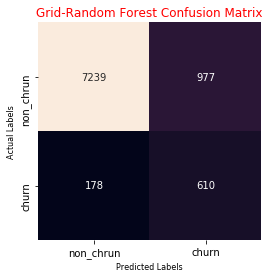

In [163]:
#Display the metrics
get_score('Grid-Random Forest',rfcg,X_test_pca,y_test,y_pred_rfcg)

**With Best fit params Random Forest Sensitivity has been increased from 0.53 to 0.77 which is a good score**

In [164]:

# import the required libraries
from sklearn.tree import DecisionTreeClassifier

# set hyper parameters
best_params  = {'max_depth': 15,
                'max_features': 25,
                'min_samples_leaf': 100,
                'min_samples_split': 20,
                'random_state': 10,
                'criterion':'entropy'}

# Build Decision tree using best params
dtree=DecisionTreeClassifier(**best_params)

#fit the decision tree model
dtree.fit(X_train_pca, y_train)

#predict the results of model with test data
y_test_dtree=dtree.predict(X_test_pca)

             Grid-Decision Tree
Accuracy               0.821635
Sensitivity            0.734772
Specificity            0.829966
Precision              0.293016
F1 score               0.782369
AUC                    0.418958


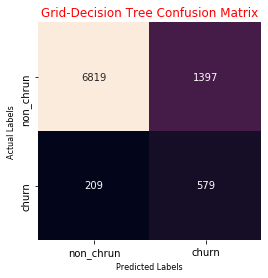

In [165]:
#Display the metrics
get_score('Grid-Decision Tree',dtree,X_test_pca,y_test,y_test_dtree)

## Linear SVM##

In [166]:
# import the required libraries
from sklearn.svm import LinearSVC

# Build Linear SVM model
svm=LinearSVC()

# fit the Linear SVM  model 
svm.fit(X_train_pca,y_train)

#predict the results of model with test data
y_pred_svm=svm.predict(X_test_pca)

                  SVM
Accuracy     0.801866
Sensitivity  0.847716
Specificity  0.797468
Precision    0.286449
F1 score     0.822592
AUC          0.428205


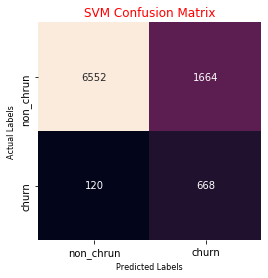

In [167]:
#Display the metrics
get_score('SVM',svm,X_test_pca,y_test,y_pred_svm)

## Boosting model ##

## Adaboost ##

In [168]:
# import the required libraries
from sklearn.ensemble import AdaBoostClassifier

#Build the adaboost model 
abc = AdaBoostClassifier(n_estimators=100)

# fit the Linear SVM  model 
abc.fit(X_train_pca,y_train)

#predict the results of model with test data
y_pred_abc=abc.predict(X_test_pca)


             Adaboost
Accuracy     0.834296
Sensitivity  0.809645
Specificity  0.836660
Precision    0.322222
F1 score     0.823152
AUC          0.460983


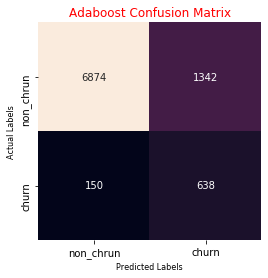

In [169]:
#Display the metrics
get_score('Adaboost', abc,X_test_pca,y_test,y_pred_abc)

The Entire Score Grid for all the models

In [188]:
score_df.loc[:,['Logistic Regression','LogRec PCA','Default-Random Forest','Grid-Random Forest', 'Grid-Decision Tree', 'SVM', 'Adaboost']]

,Logistic Regression,LogRec PCA,Default-Random Forest,Grid-Random Forest,Grid-Decision Tree,SVM,Adaboost
Accuracy,0.925033,0.811750,0.911928,0.871724,0.821635,0.801866,0.834296
Sensitivity,0.251269,0.841371,0.560914,0.774112,0.734772,0.847716,0.809645
Specificity,0.989654,0.808909,0.945594,0.881086,0.829966,0.797468,0.836660
Precision,0.699647,0.296910,0.497188,0.384373,0.293016,0.286449,0.322222
F1 score,0.620462,0.825140,0.753254,0.827599,0.782369,0.822592,0.823152
AUC,0.369748,0.438928,0.527132,0.513684,0.418958,0.428205,0.460983


## Result of Classfication models##

Compared to Baseline Logistic model, SVM model performed with better classificaiton and specificity score of 85%

**SVM and Logistic regression have the Sensitivity as 85 and 84% which is a good indicator to correctly identify
the  percentage of churned cusomters who are correctly identified as having churned**

# Steps Followed

1. Build Logistic regression model with the main objective of identifying important predictor without PCA

2. Identify important predictors, display them visually - 

3. Display feature importance summary tables
 
4. Recommend strategies to manage customer churn

In [171]:

# import the required libraries
from sklearn.ensemble import RandomForestClassifier


# Assign features other than churn
X = high_valued_tel_df.drop(['churn'],axis=1)

# target response variable
y = high_valued_tel_df['churn']

# instantiate standard scalar
scaler = StandardScaler()

# fit the scaled model
X_scaled = scaler.fit_transform(X)

#convert to dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=7)

# Build Random Forest model with default params

# set hyper parameters
best_params  = {'max_depth': 10,
                'max_features': 10,
                'min_samples_leaf': 100,
                'min_samples_split': 200,
                'random_state': 10,
                'criterion':'entropy'}


rfc= RandomForestClassifier(**best_params,n_estimators=100) 

# fit the Random forest model 
rfc.fit(X_train,y_train)

#predict the results of model with test data
y_pred_rfc=rfc.predict(X_test)


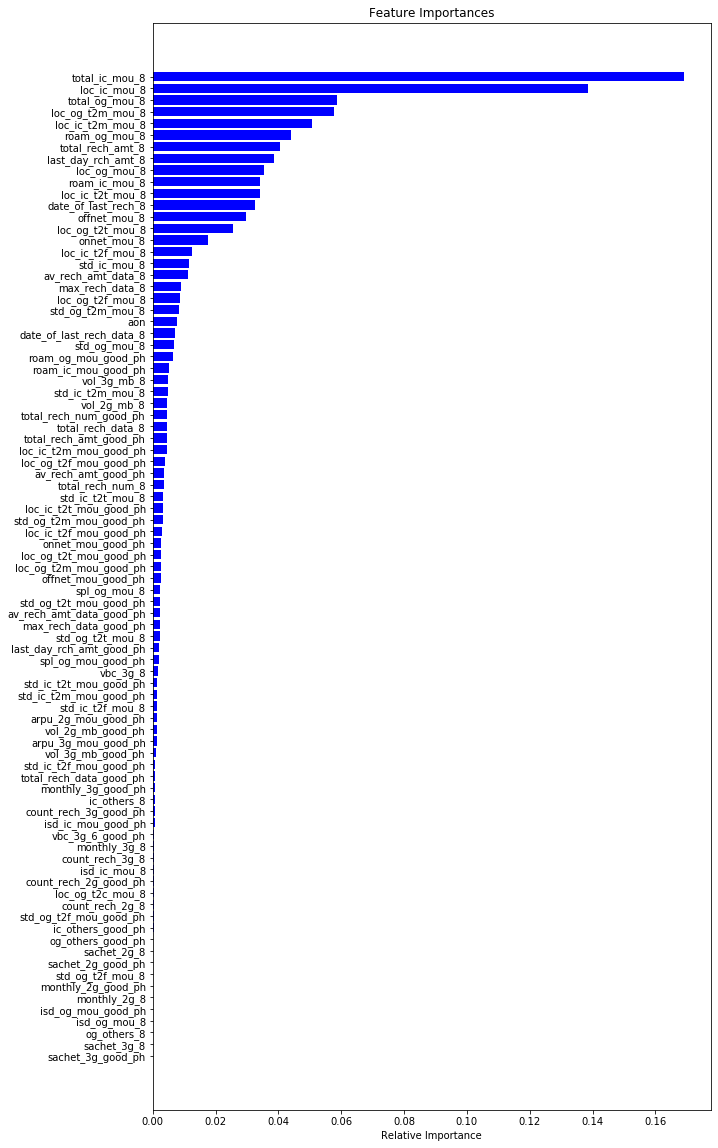

In [172]:
features = X_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center') 
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

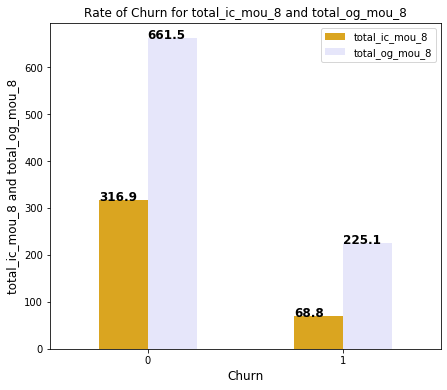

In [173]:

# High variance in income & outgoing call voice calls has probability of churn is high 

plot_bar(['total_ic_mou_8','total_og_mou_8'],'total_ic_mou_8 and total_og_mou_8',colors=['#daa520','#e6e6fa']);

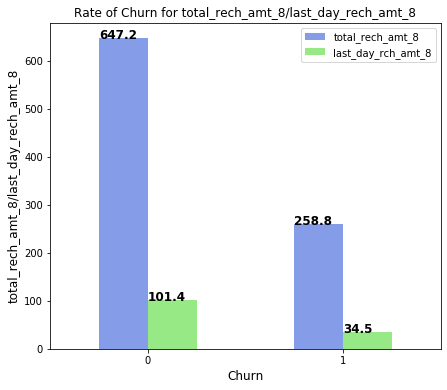

In [174]:
# High variance in total_rech_amt_8 & last_day_rch_amt_8 has probability of churn is high 

plot_bar(['total_rech_amt_8','last_day_rch_amt_8'],'total_rech_amt_8/last_day_rech_amt_8');

## Top 50 feature importances ##

In [175]:
sorted_idx = np.argsort(rfc.feature_importances_)[::-1]
X_train.columns[sorted_idx[:50]]


Index(['total_ic_mou_8', 'loc_ic_mou_8', 'total_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_ic_t2m_mou_8', 'roam_og_mou_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'loc_og_mou_8', 'roam_ic_mou_8',
       'loc_ic_t2t_mou_8', 'date_of_last_rech_8', 'offnet_mou_8',
       'loc_og_t2t_mou_8', 'onnet_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_mou_8',
       'av_rech_amt_data_8', 'max_rech_data_8', 'loc_og_t2f_mou_8',
       'std_og_t2m_mou_8', 'aon', 'date_of_last_rech_data_8', 'std_og_mou_8',
       'roam_og_mou_good_ph', 'roam_ic_mou_good_ph', 'vol_3g_mb_8',
       'std_ic_t2m_mou_8', 'vol_2g_mb_8', 'total_rech_num_good_ph',
       'total_rech_data_8', 'total_rech_amt_good_ph', 'loc_ic_t2m_mou_good_ph',
       'loc_og_t2f_mou_good_ph', 'av_rech_amt_good_ph', 'total_rech_num_8',
       'std_ic_t2t_mou_8', 'loc_ic_t2t_mou_good_ph', 'std_og_t2m_mou_good_ph',
       'loc_ic_t2f_mou_good_ph', 'onnet_mou_good_ph', 'loc_og_t2t_mou_good_ph',
       'loc_og_t2m_mou_good_ph', 'offnet_mou_good_ph',

# Summary table of Feature importance with scores

In [176]:
for index in sorted_idx:
    print([X_train.columns[index], rfc.feature_importances_[index]]) 

['total_ic_mou_8', 0.16921081224150472]
['loc_ic_mou_8', 0.13854136390604724]
['total_og_mou_8', 0.05859291472139184]
['loc_og_t2m_mou_8', 0.05778350928559099]
['loc_ic_t2m_mou_8', 0.050562567510812284]
['roam_og_mou_8', 0.0441341940103968]
['total_rech_amt_8', 0.04041559588854385]
['last_day_rch_amt_8', 0.038716161883616027]
['loc_og_mou_8', 0.03535396323250689]
['roam_ic_mou_8', 0.03413684166289779]
['loc_ic_t2t_mou_8', 0.03400873258361831]
['date_of_last_rech_8', 0.03245434366629552]
['offnet_mou_8', 0.029519314573365468]
['loc_og_t2t_mou_8', 0.025560953150404235]
['onnet_mou_8', 0.01769163824305766]
['loc_ic_t2f_mou_8', 0.012484086994627662]
['std_ic_mou_8', 0.011380494539629606]
['av_rech_amt_data_8', 0.011355549331252527]
['max_rech_data_8', 0.008818114344921996]
['loc_og_t2f_mou_8', 0.008560823536621383]
['std_og_t2m_mou_8', 0.008276740290331265]
['aon', 0.007616137153844088]
['date_of_last_rech_data_8', 0.006994145758872834]
['std_og_mou_8', 0.0067825910248910295]
['roam_og_mou

This model infers that  both of the good phase and action phase features impacts on customer churn. 

**Good phase features**

Some of good phase features

**roam_og_mou_good_ph and roam_ic_mou_good_ph**  Increase in roam rate of incoming and outgoing calls increases chrun

**age on network** As age on network increases there is less probablity of chances of churn

**onnet and offnet** Regradless of call types, if same network or other network usage increases it reults in high churn

**action phase features**

**loc_ic_t2t_mou_8 and loc_t2m_mou_8**  if the local incoming calls for t2t or t2m decreases then there are high possibility of customer churn.

**max_rech_data_8** if the maxium recharge data decline it also impaxts chunr

## Recommendations to Telcom company to  reduce Customer Churn ##

1.Reduce the roaming charges or make it free for the long aged customers.

2.Provide customized offers say reduce the mou usage charge at night for onnet and offnet calls 

3.Currently, in 2G and 3G business company is generating loss.Better to expand the tower in appropirate areas to cover wider coverage.

4.Need to reduce the charge on data to retain customers for long run. 

